# Predicting explicit user feedback through Machine Learning
For the course Fundamentals of Machine Learning, explicit user feedback will be predicted on [Roco](https://does-anyone.notion.site/Roco-Recommendations-on-command-c70bc4995d134622a5f8ec37319200f6) - a social recommendation platform.

## 1 Introduction

### 1.1 Context & practical relevance
[Roco](https://does-anyone.notion.site/Roco-Recommendations-on-command-c70bc4995d134622a5f8ec37319200f6) is a platform for sharing and storing personal recommendations, keeping track of their consumption, and giving and receiving feedback on them from friends.
As Roco is a start-up with a new product in the market, and a small exposure, they are subject to cold-start and data sparsity problems (Leung et al., 2008; Nilashi et al., 2018). The cold-start problem describes two different issues:
1.	A new user joins Roco and has not interacted with any or not enough recommendations from their friends yet, in order for Roco to make a suggestion on which item to show to the user first. Due to the lack of data on the user, Roco cannot give accurate recommendations to the user (Bykau, 2013; Ji & Shen, 2015).
2.	A new item has not been rated or received feedback, so Roco does not know whom to show the item to, as it does not have any data on which users could be interested (Bykau, 2013; Ji & Shen, 2015).

If Roco cannot produce accurate suggestions for the recommendations to the user, they risk irritating the user and losing them by abandoning the service altogether (Ye et al., 2011). Therefore, it is important for Roco to predict which items will most likely lead to a satisfactory experience for the user.

<mark>when uploading to github, dataset: gitignore to not upload the data set to github<mark>

### 1.2 Research question
Using information about a recommendation such as media type, weekday, tags, or a personal note from the sender to the receiver to predict how likely the receiver is going to give feedback as a personal text-based feedback. The research question is: Can a machine learning model accurately predict if explicit user feedback is given?

## 2 Data set

### 2.1 Data aquisition
For this study, data were collected through [Roco](https://does-anyone.notion.site/Roco-Recommendations-on-command-c70bc4995d134622a5f8ec37319200f6), a social recommendation platform. The platform employs data from users interacting with each other by sending recommendations such as movies, books, websites, places, etc. through links. The users can then state if they already interacted with the item and/or finished interacting with it and rate their friends'recommendation.
Two different data sets have been obtained from Roco. The first data set consists of user data, where personally identifying data such as the names of the senders and receivers have been anonymized beforehand by assigning a unique ID to every user on the platform.
The second data set consists of item metadata of the recommendations that have been sent. Combining the two data sets to one main data set on their shared ID, the data set includes features such as:
-	The title of the recommendation
-	The media type of the recommendation
-	The link to the recommendation
-	A personal note from the sender of the recommendation to the receiver
-	Tags that are either created by default for the specific media type and/or added by the sender of the recommendation
-	The creator of the piece of content (i.e. director of a movie, author of a book, etc.)
-	The duration of minutes it takes to finish the recommendation (i.e. the duration of a movie, the estimated time it takes to read a book)
-	The recipient of the recommendation
-	The sender of the recommendation
-	An indication of whether the receiver of the recommendation already started interacting with the content stated by the receiver themselves
-	Feedback in form of a rating of the recommendation
-	Personal feedback in form of a text from the receiver of the recommendation
-	An indication of whether the receiver of the recommendation already finished interacting with the content stated by the receiver themselves
-	A timestamp with the date and time of when the recommendation was sent

In [409]:
import seaborn as sns  
import pandas as pd
import numpy as np
import time
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
from PIL import Image
import matplotlib.pyplot as plt 

import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [410]:
# Loading user interaction data
user_data = pd.read_csv("user_interaction.csv", index_col=[0])
user_data.head()

,Roco ID,sender_id,recipient_id,Date and Time,Started,Finished,Liked it?,Feedback
0,vWiiDYtumjRfptooiugKmGskJ6pCrSgD,2,0,"June 20, 2022 12:45 PM",No,No,NaN,NaN
1,43YLNwT1sBViNUXzmyWNiQR1Id7agOEO,2,0,"June 8, 2022 6:57 PM",No,No,NaN,NaN
2,tu7Orc5WEEowMDDlQJhx7IyLm9GR2V6g,2,0,"June 1, 2022 10:09 AM",No,No,NaN,NaN
3,MF8j83NWF1k2J5WeHpNLl6mfp6cE73GW,2,0,"May 26, 2022 3:52 PM",No,No,NaN,NaN
4,dfHA1FDAYQE8DwOCAh7luiEC92UBIckY,2,0,"May 24, 2022 10:02 PM",No,No,NaN,NaN


In [411]:
# Loading item metadata
item_metadata = pd.read_csv("item_metadata.csv", index_col=[0])
item_metadata.head()

,Roco ID,Title,Media type,Link,Notes,Tags,Creator,Duration in min
0,vWiiDYtumjRfptooiugKmGskJ6pCrSgD,Vespa Caravan,▶️ Video,https://youtu.be/wzGYiUVkqqM,It’s even blue,video,NaN,NaN
1,43YLNwT1sBViNUXzmyWNiQR1Id7agOEO,Keyword Surfer - Browser Extension,💻 Website,https://chrome.google.com/webstore/detail/keyw...,Lets you browse keywords as you search and dis...,"data, entrepreneur, marketing, research, start-up",NaN,NaN
2,tu7Orc5WEEowMDDlQJhx7IyLm9GR2V6g,Good News Podcast,🎙 Podcast,https://pca.st/podcast/9c2dfda0-bb85-0135-9e60...,NaN,NaN,Cards against Humanity,NaN
3,MF8j83NWF1k2J5WeHpNLl6mfp6cE73GW,Why You Can't Pay Attention And Focus - Johann...,▶️ Video,https://www.youtube.com/watch?v=ASVH-MTfJbc,Good piece on the attention crisis we are livi...,"attention, society, technology, video",NaN,NaN
4,dfHA1FDAYQE8DwOCAh7luiEC92UBIckY,GeoGuessr,💻 Website,https://www.geoguessr.com/,NaN,"travel, virtual, website",NaN,NaN


In [412]:
# Merging user interaction data with item metadata
df = pd.merge(user_data, item_metadata, on="Roco ID")
df.head()

,Roco ID,sender_id,recipient_id,Date and Time,Started,Finished,Liked it?,Feedback,Title,Media type,Link,Notes,Tags,Creator,Duration in min
0,vWiiDYtumjRfptooiugKmGskJ6pCrSgD,2,0,"June 20, 2022 12:45 PM",No,No,NaN,NaN,Vespa Caravan,▶️ Video,https://youtu.be/wzGYiUVkqqM,It’s even blue,video,NaN,NaN
1,43YLNwT1sBViNUXzmyWNiQR1Id7agOEO,2,0,"June 8, 2022 6:57 PM",No,No,NaN,NaN,Keyword Surfer - Browser Extension,💻 Website,https://chrome.google.com/webstore/detail/keyw...,Lets you browse keywords as you search and dis...,"data, entrepreneur, marketing, research, start-up",NaN,NaN
2,tu7Orc5WEEowMDDlQJhx7IyLm9GR2V6g,2,0,"June 1, 2022 10:09 AM",No,No,NaN,NaN,Good News Podcast,🎙 Podcast,https://pca.st/podcast/9c2dfda0-bb85-0135-9e60...,NaN,NaN,Cards against Humanity,NaN
3,MF8j83NWF1k2J5WeHpNLl6mfp6cE73GW,2,0,"May 26, 2022 3:52 PM",No,No,NaN,NaN,Why You Can't Pay Attention And Focus - Johann...,▶️ Video,https://www.youtube.com/watch?v=ASVH-MTfJbc,Good piece on the attention crisis we are livi...,"attention, society, technology, video",NaN,NaN
4,dfHA1FDAYQE8DwOCAh7luiEC92UBIckY,2,0,"May 24, 2022 10:02 PM",No,No,NaN,NaN,GeoGuessr,💻 Website,https://www.geoguessr.com/,NaN,"travel, virtual, website",NaN,NaN


### 2.2 Data cleaning

#### 2.2.1 General overview
After merging the data, the data set is going to be explored and adjusted for further analysis. The following code gives a general overview on the data set.

In [413]:
# getting info on the data I am working with
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 0 to 227
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Roco ID          228 non-null    object 
 1   sender_id        228 non-null    int64  
 2   recipient_id     228 non-null    int64  
 3   Date and Time    228 non-null    object 
 4   Started          228 non-null    object 
 5   Finished         228 non-null    object 
 6   Liked it?        45 non-null     object 
 7   Feedback         40 non-null     object 
 8   Title            225 non-null    object 
 9   Media type       224 non-null    object 
 10  Link             219 non-null    object 
 11  Notes            185 non-null    object 
 12  Tags             195 non-null    object 
 13  Creator          137 non-null    object 
 14  Duration in min  114 non-null    float64
dtypes: float64(1), int64(2), object(12)
memory usage: 28.5+ KB


In [414]:
# renaming the columns to make working with them easier, replacing spaces with underscores
df.columns = [c.lower().replace(" ", "_") for c in df.columns]
df.head(2)

,roco_id,sender_id,recipient_id,date_and_time,started,finished,liked_it?,feedback,title,media_type,link,notes,tags,creator,duration_in_min
0,vWiiDYtumjRfptooiugKmGskJ6pCrSgD,2,0,"June 20, 2022 12:45 PM",No,No,NaN,NaN,Vespa Caravan,▶️ Video,https://youtu.be/wzGYiUVkqqM,It’s even blue,video,NaN,NaN
1,43YLNwT1sBViNUXzmyWNiQR1Id7agOEO,2,0,"June 8, 2022 6:57 PM",No,No,NaN,NaN,Keyword Surfer - Browser Extension,💻 Website,https://chrome.google.com/webstore/detail/keyw...,Lets you browse keywords as you search and dis...,"data, entrepreneur, marketing, research, start-up",NaN,NaN


In [415]:
# getting information on number of entries and features
print("There are {} recommendations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))

There are 228 recommendations and 15 features in this dataset. 



All entries have a sender and a recipient, a date and timestamp, and an indication whether the user interacted with the recommendation. Some entries though are missing information such as the title, the media type, the link, a note, etc.

#### 2.2.2 Link

In [416]:
# getting information on number of different links
print("There are {} unique links in this dataset. \n".format(len(df.link.unique())))

There are 148 unique links in this dataset. 



Every user who joins the platform gets a recommendation on how to leave feedback on Roco as a YouTube tutorial. To make a meaningful analysis of the data, the inital recommendation that contains the video tutorial will be excluded from the data set.

In [417]:
# Removing all recommendations created by the Roco team
df = df[df.link != "https://www.youtube.com/watch?v=fufz1cK3pJc"]
# Checking how many recommendations there are in the dataset
print("There are {} recommendations in this dataset. \n".format(df.shape[0]))



There are 191 recommendations in this dataset. 



#### 2.2.3 Media type
In order to assess the different kinds of media types that are available on the platform and to see how many times each media type got shared, the media types will be aggregated and plotted in a barchart.

In [418]:
# getting information on number of different media types
print("There are {} different media types in this dataset such as {}... \n".format(len(df.media_type.unique()),", ".join(df.media_type.unique()[0:8])))

There are 14 different media types in this dataset such as ▶️ Video, 💻 Website, 🎙 Podcast, 🎶 Music, 📰 Article, 🎁 Product, 🎬 Movie, 🎞 Series... 



In [419]:
# Grouping by media type, aggregating by sender ID, and saving it in the media type dataframe
df_media_type = df.groupby("media_type").agg({"sender_id":"count"}).reset_index()
df_media_type

,media_type,sender_id
0,▶️ Video,53
1,🎁 Product,14
2,🎙 Podcast,14
3,🎞 Series,8
4,🎬 Movie,13
5,🎭 Event,2
6,🎮 Game,4
7,🎶 Music,24
8,🏞 Place,1
9,👾 Code,1


In [420]:
# Removing emojis for better readability
def media_type(s):
    if s == "🎬 Movie":
        return "movie"
    elif s == "▶️ Video":
        return "video"
    elif s == "🎞 Series":
        return "series"
    elif s == "🎶 Music":
        return "music"
    elif s == "🎙 Podcast":
        return "podcast"
    elif s == "💻 Website":
        return "website"
    elif s == "📰 Article":
        return "article"
    elif s == "📖 Book":
        return "book"
    elif s == "🎁 Product":
        return "product"
    elif s == "🎮 Game":
        return "game"
    elif s == "👾 Code":
        return "code"
    elif s == "🎭 Event":
        return "event"
    elif s == "🏞 Place":
        return "place"
    else:
        return "no media type"
    return ""

df["media_type"] = df["media_type"].apply(media_type)
df_media_type = df.groupby("media_type").agg({"sender_id":"count"}).reset_index()
df_media_type

,media_type,sender_id
0,article,15
1,book,10
2,code,1
3,event,2
4,game,4
5,movie,13
6,music,24
7,no media type,4
8,place,1
9,podcast,14


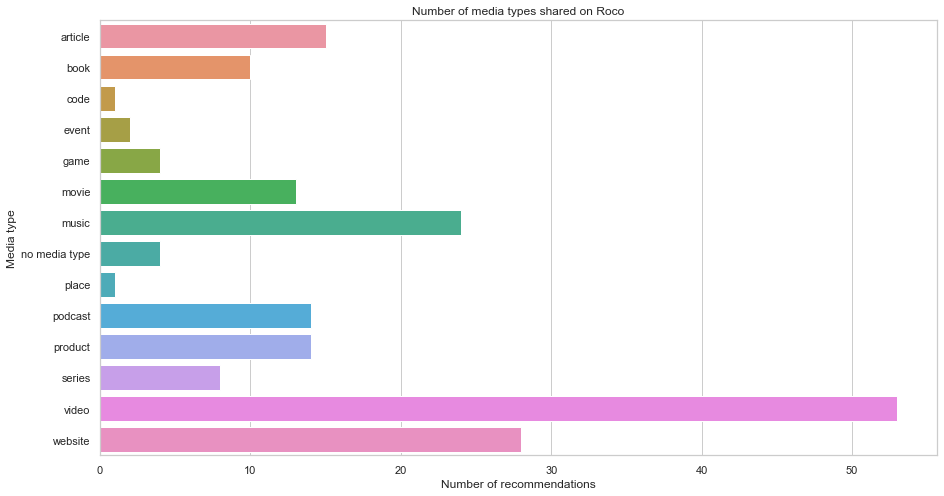

In [421]:
# Plotting the bar chart
ax = sns.barplot(data=df_media_type,x="sender_id",y="media_type").set(title="Number of media types shared on Roco",xlabel="Number of recommendations",ylabel="Media type")
sns.set(rc = {"figure.figsize":(15,8)})

The analysis of the media type above, shows that the most shared recommendations on Roco are videos (53 recommendations), the least shared code and places (one recommendations each). Videos get shared almost more than twice as often as websites, which are the second most shared recommendation on the platform.

#### 2.2.4 Tags
To assess what kind of content gets shared on Roco, the tags will be analyzed by creating a wordcloud. The wordcloud shows which tags get used most. The bigger the word appears in the wordcloud, the more often it got used on Roco.

In [422]:
print("There are {} different tags in this dataset such as {}, etc. \n".format(len(df.tags.unique()),", ".join(df.tags.unique()[0:2])))

There are 65 different tags in this dataset such as video, data, entrepreneur, marketing, research, start-up, etc. 



In [423]:
# Grouping by tags, aggregating by sender ID, and saving it in the tags dataframe
#pd.set_option("display.max_rows", None)
df_tags = df.groupby("tags").agg({"sender_id":"count"}).reset_index()#.sort_values(by="sender_id",ascending=False)
df_tags

,tags,sender_id
0,"Biology, Moles, video",2
1,"Cantonese Chinese, atmospheric, bittersweet, m...",1
2,Classic,1
3,"Hobbs, book, philosophy",1
4,"LGBTQI+, gender, sexuality, shame, video, vide...",1
...,...,...
59,start-up,1
60,"start-up, user interface design",1
61,"travel, virtual, website",1
62,video,24


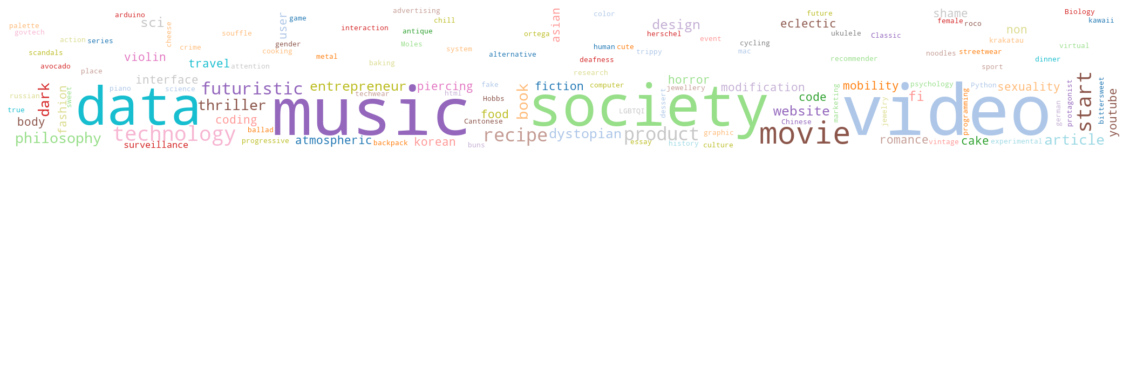

In [424]:
# Create wordcloud
wordcloud = df_tags["tags"].values 
# Create mask to show wordcloud in Roco logo
mask = np.array(Image.open("/Users/anjadinkel/Documents/Studium/Utrecht DDD/Fundamentals of Machine Learning/Resit/Roco.png"))
def transform_zeros(val):
    if val == 0:
        return 255
    else:
        return val
mask = np.ndarray((mask.shape[0],mask.shape[1]), np.int32)
for i in range(len(mask)):
    mask[i] = list(map(transform_zeros, mask[i]))
wordcloud = WordCloud().generate(str(df_tags))
wordcloud = WordCloud(width = 1200, height = 900, collocations=False, random_state=1, background_color="white", contour_width=0.5, contour_color="#ffffff", mask=mask, colormap="tab20").generate(",".join(df_tags["tags"]))
image_colors = ImageColorGenerator(mask)
WordCloud.generate_from_frequencies
plt.figure(figsize=[20,20])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

From the wordcloud it becomes evident that the most used tags are video, music, technology, movie, etc.

#### 2.2.5 Sender
In order to assess the user base of Roco, the senders of recommendations will be looked at in more detail. The most active users and their number of sent recommendations will be analyzed, as well as their contribution to overall shared recommendations.

In [425]:
print("There are {} unique senders in this dataset. \n".format(len(df.sender_id.unique())))

There are 14 unique senders in this dataset. 



In [426]:
df["sender_id"].value_counts()

4     51
2     45
11    35
0     24
3     15
1      9
28     3
9      2
35     2
15     1
30     1
32     1
22     1
24     1
Name: sender_id, dtype: int64

In [427]:
# Grouping by senders, aggregating by recipient ID, and saving it in the sender dataframe
df_sender = df.groupby("sender_id").agg({"recipient_id":"count"}).reset_index()
df_sender

,sender_id,recipient_id
0,0,24
1,1,9
2,2,45
3,3,15
4,4,51
5,9,2
6,11,35
7,15,1
8,22,1
9,24,1


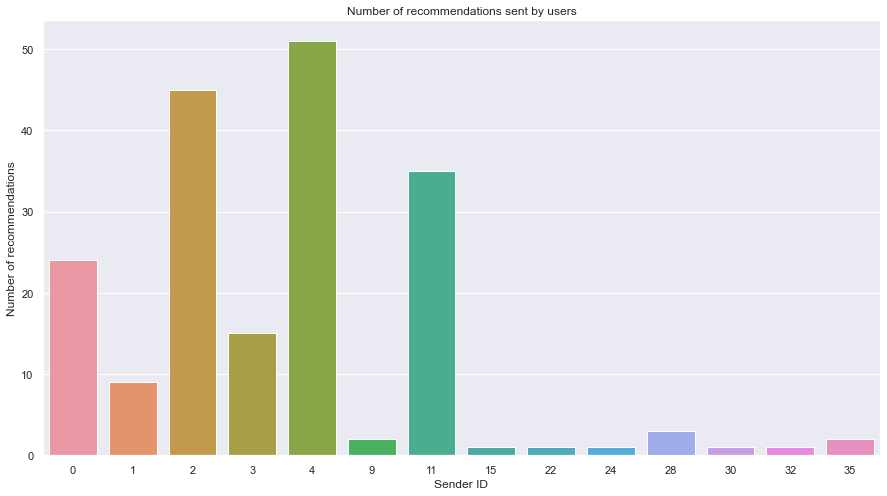

In [428]:
# Create bar chart for senders of recommendations
sns.barplot(data=df_sender,x="sender_id",y="recipient_id").set(title="Number of recommendations sent by users",xlabel="Sender ID",ylabel="Number of recommendations")
sns.set(rc = {"figure.figsize":(15,8)})

In [429]:
# Calculating the top users in percent
top_users = 100/14*3
# Calculating the recommendations of the top users
top_recommendations = 100/191*(51+45+35)
print("The data shows that the top",round(top_users,2),"% of users are responsible for",round(top_recommendations,2),"% of the recommendations.")

The data shows that the top 21.43 % of users are responsible for 68.59 % of the recommendations.


#### 2.2.6 Recipients
In order to assess the user base of Roco, the recipients of recommendations will be looked at in more detail. The most active users and their number of received recommendations will be analyzed, as well as their contribution to overall received recommendations.

In [430]:
print("There are {} unique recipients in this dataset. \n".format(len(df.recipient_id.unique())))

There are 28 unique recipients in this dataset. 



In [431]:
df["recipient_id"].value_counts()

4     65
11    30
1     17
0     15
2     15
3     13
10     4
35     3
27     2
24     2
31     2
29     2
28     2
30     2
22     2
9      2
7      2
23     1
21     1
32     1
33     1
36     1
15     1
8      1
44     1
6      1
5      1
43     1
Name: recipient_id, dtype: int64

In [432]:
# Grouping by recipients, aggregating by sender ID, and saving it in the recipient dataframe
df_recipient = df.groupby("recipient_id").agg({"sender_id":"count"}).reset_index()
df_recipient

,recipient_id,sender_id
0,0,15
1,1,17
2,2,15
3,3,13
4,4,65
5,5,1
6,6,1
7,7,2
8,8,1
9,9,2


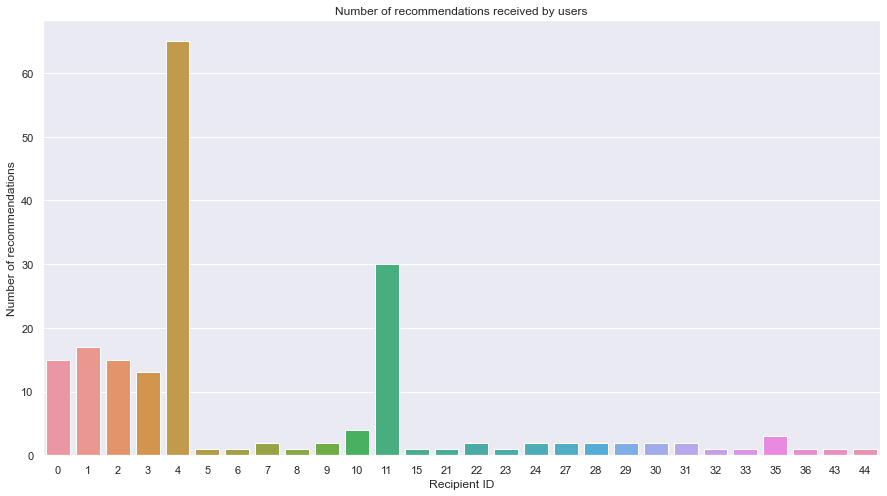

In [433]:
# Creating bar chart for recipients of recommendations
sns.barplot(data=df_recipient,x="recipient_id",y="sender_id").set(title="Number of recommendations received by users",xlabel="Recipient ID",ylabel="Number of recommendations")
sns.set(rc = {"figure.figsize":(15,8)})

In [434]:
# Calculating the top users in percent
top_users = 100/28*6
# Calculating the recommendations of the top users
top_recommendations = 100/191*(65+30+17+15+15+13)
print("The data shows that the top",round(top_users,2),"% of users are receiving",round(top_recommendations,2),"% of the recommendations.")

The data shows that the top 21.43 % of users are receiving 81.15 % of the recommendations.


#### 2.2.7 Feedback

In [435]:
# Wanted to check possibility for sentiment analysis on feedback, unfortunately, only 37 recommendations contain feedback.
no_feedback = df["feedback"].isna().sum()
feedback = 191 - no_feedback
print(feedback,"entries in the data set contain feedback.")

37 entries in the data set contain feedback.


In [436]:
df.isnull().sum()

roco_id              0
sender_id            0
recipient_id         0
date_and_time        0
started              0
finished             0
liked_it?          153
feedback           154
title                3
media_type           0
link                 9
notes               43
tags                33
creator             91
duration_in_min    114
dtype: int64

## 3 Feature Engineering
 The different media types all have an attention span depending on what kind of media they represent. The attention span for each media type will be assessed and added to the data frame. To assess what influence the personal note and the used tags have on giving feedback on a recommendation, the length of the personal note, as well as the feedback will be measured in characters, and the length of tags will be measured by the number of tags used. Additionally, the date and time will be analyzed apart to find out which day of the week and which hour and minute of the day the recommendations were sent. As mentioned before, not every entry in the data set has a title, media type, link, personal note, tag, creator, duration, rating or feedback. Therefore, these variables will be transformed into dummy variables, to indicate whether the information for that value was given and to make them processable for the ML model.

### 3.1 Attention type variable
Yang et al. (2012) elaborated on the idea of Ma et al. (2011) that a user trusts different groups of friends for different categories of items. Extending that approach, a new variable will be introduced that categorizes the specific media types into types of attention the user pays to the medium. Attention types that will be used for media types are: watch, listen, read, play, and adventure.

In [437]:
# Categorizing media types in attention that the user can pay to the item
# watch: Movies, Series, Videos
# listen: Music, Podcasts
# read: Websites, Articles, Books
# play: Products, Games, Code
# adventure: Places, Events
def attention(s):
    if s == "movie":
        return "watch"
    elif s == "video":
        return "watch"
    elif s == "series":
        return "watch"
    elif s == "music":
        return "listen"
    elif s == "podcast":
        return "listen"
    elif s == "website":
        return "read"
    elif s == "article":
        return "read"
    elif s == "book":
        return "read"
    elif s == "product":
        return "play"
    elif s == "game":
        return "play"
    elif s == "code":
        return "play"
    elif s == "event":
        return "adventure"
    elif s == "place":
        return "adventure"
    else:
        return "no_media_type"
    return ""

df["attention"] = df["media_type"].apply(attention)
df.head(3)

,roco_id,sender_id,recipient_id,date_and_time,started,finished,liked_it?,feedback,title,media_type,link,notes,tags,creator,duration_in_min,attention
0,vWiiDYtumjRfptooiugKmGskJ6pCrSgD,2,0,"June 20, 2022 12:45 PM",No,No,NaN,NaN,Vespa Caravan,video,https://youtu.be/wzGYiUVkqqM,It’s even blue,video,NaN,NaN,watch
1,43YLNwT1sBViNUXzmyWNiQR1Id7agOEO,2,0,"June 8, 2022 6:57 PM",No,No,NaN,NaN,Keyword Surfer - Browser Extension,website,https://chrome.google.com/webstore/detail/keyw...,Lets you browse keywords as you search and dis...,"data, entrepreneur, marketing, research, start-up",NaN,NaN,read
2,tu7Orc5WEEowMDDlQJhx7IyLm9GR2V6g,2,0,"June 1, 2022 10:09 AM",No,No,NaN,NaN,Good News Podcast,podcast,https://pca.st/podcast/9c2dfda0-bb85-0135-9e60...,NaN,NaN,Cards against Humanity,NaN,listen


In [438]:
# Choosing order for uniform plotting
df["attention"] = pd.Categorical(df["attention"], ["watch", "listen", "read", "play", "adventure", "no_media_type"])

In [439]:
# Creating attention type data frame
df_attention = df.groupby("attention").agg({"sender_id":"count"}).reset_index()
df_attention


,attention,sender_id
0,watch,74
1,listen,38
2,read,53
3,play,19
4,adventure,3
5,no_media_type,4


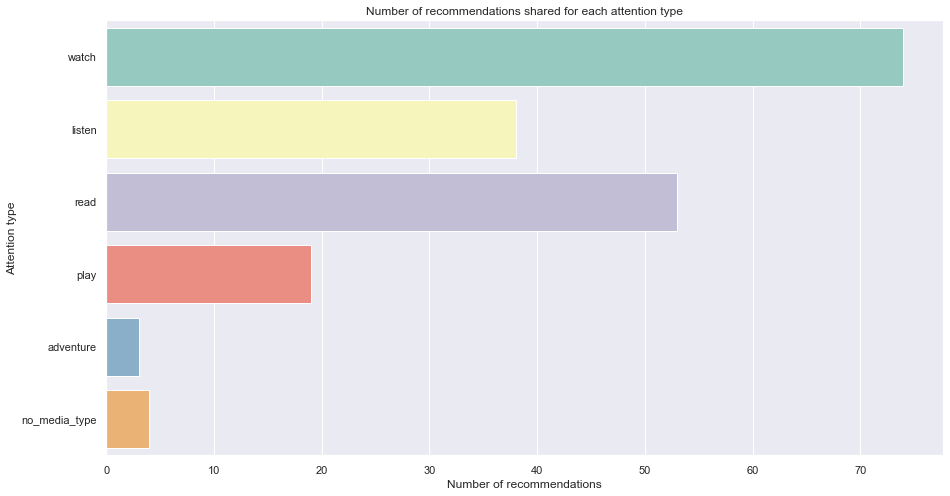

In [440]:
# Plotting the bar chart
ax = sns.barplot(data=df_attention,x="sender_id",y="attention", palette="Set3").set(title="Number of recommendations shared for each attention type",xlabel="Number of recommendations",ylabel="Attention type")

The attention type with most recommendations is the type watch with over 70 entries in the data set. This is not surprising, as [2.2.3](#223-media-type) showed that the most shared media type was video. The second and third most shared media types were websites (attention type: read) and music (attention type: listen), which reflects the results for the second and third most common type of attention read and listen.

### 3.2 Length of personal note
The personal note attached to a recommendation is an important feature that lets users share why they recommend a certain item. Bilgic et al. (2005) found that explaining recommendations improves user's estimation of the item quality. Sinha & Swearingen (n.d.) showed that friends consistently provided better recommendations than algorithmic recommender systems.
In order to refine the impact of a personal note on the prediction, the length of the personal note will be assessed in single characters.

In [441]:
# Getting the length of the note in characters
df["note_length"] = df["notes"].str.len()
df["note_length"].fillna(0, inplace = True)
df.head(3)

,roco_id,sender_id,recipient_id,date_and_time,started,finished,liked_it?,feedback,title,media_type,link,notes,tags,creator,duration_in_min,attention,note_length
0,vWiiDYtumjRfptooiugKmGskJ6pCrSgD,2,0,"June 20, 2022 12:45 PM",No,No,NaN,NaN,Vespa Caravan,video,https://youtu.be/wzGYiUVkqqM,It’s even blue,video,NaN,NaN,watch,14.0
1,43YLNwT1sBViNUXzmyWNiQR1Id7agOEO,2,0,"June 8, 2022 6:57 PM",No,No,NaN,NaN,Keyword Surfer - Browser Extension,website,https://chrome.google.com/webstore/detail/keyw...,Lets you browse keywords as you search and dis...,"data, entrepreneur, marketing, research, start-up",NaN,NaN,read,84.0
2,tu7Orc5WEEowMDDlQJhx7IyLm9GR2V6g,2,0,"June 1, 2022 10:09 AM",No,No,NaN,NaN,Good News Podcast,podcast,https://pca.st/podcast/9c2dfda0-bb85-0135-9e60...,NaN,NaN,Cards against Humanity,NaN,listen,0.0


In [442]:
df["note_length"].describe()

count    191.000000
mean      70.303665
std       76.924857
min        0.000000
25%       13.000000
50%       48.000000
75%      105.000000
max      361.000000
Name: note_length, dtype: float64

[Text(0.5, 1.0, 'Distribution of note length in characters over recommendations'),
 Text(0.5, 0, 'Note length in characters'),
 Text(0, 0.5, 'Number of recommendations')]

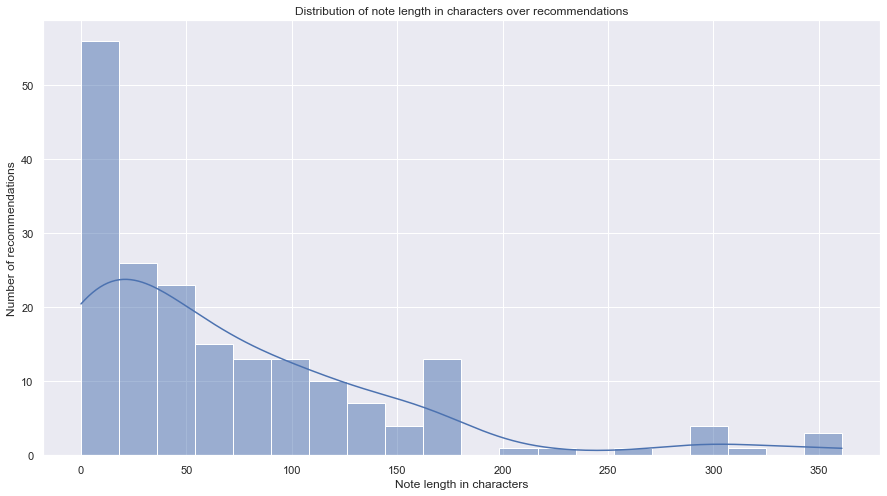

In [443]:
# Plotting the bar chart of the distribution of the note length in characters
sns.histplot(data=df,x="note_length", bins=20, kde=True).set(title="Distribution of note length in characters over recommendations",xlabel="Note length in characters",ylabel="Number of recommendations")

Over 50 enries do not contain any note and make it harder to look at the entries that actually do contain a note. In the following, only entries that contain a note will be analyzed.

In [444]:
# Removing entries where no note is given and saving in a new dataframe
df_note_length = df[["note_length", "attention"]]
df_note_length = df_note_length[df_note_length["note_length"]!=0]
df_note_length.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 0 to 219
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   note_length  148 non-null    float64 
 1   attention    148 non-null    category
dtypes: category(1), float64(1)
memory usage: 2.7 KB


In [445]:
# Looking at the distribution of the note length without 0 values
df_note_length["note_length"].describe()

count    148.000000
mean      90.729730
std       76.042916
min        4.000000
25%       35.750000
50%       70.000000
75%      118.500000
max      361.000000
Name: note_length, dtype: float64

[Text(0.5, 1.0, 'Distribution of note length in characters over recommendations'),
 Text(0.5, 0, 'Note length in characters'),
 Text(0, 0.5, 'Number of recommendations')]

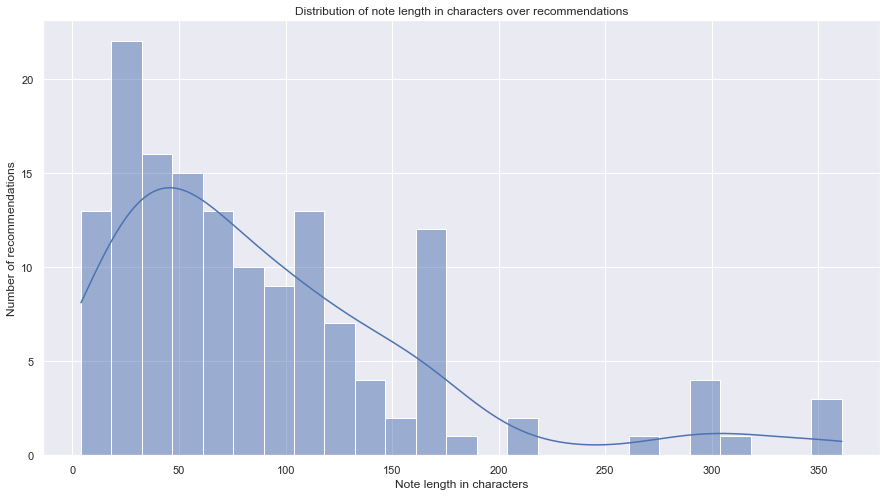

In [446]:
# Plotting the bar chart of the distribution of the note length without 0 values
sns.histplot(data=df_note_length,x="note_length", bins=25, kde=True).set(title="Distribution of note length in characters over recommendations",xlabel="Note length in characters",ylabel="Number of recommendations")

The distribution of note length is skewed right. There is a concentration of data at around 50 characters and a long tail to the right. The vast majority of notes contain the lowest number of characters and very few notes contains more than 200 characters. The data range from 4 to 361 characters, so the approximate range equals 361 - 4 = 357 characters.
Next, the distribution of note length over the attention type will be analyzed.

[Text(0.5, 1.0, 'Distribution of note length in characters over attention type'),
 Text(0.5, 0, 'Note length in characters'),
 Text(0, 0.5, 'Attention type')]

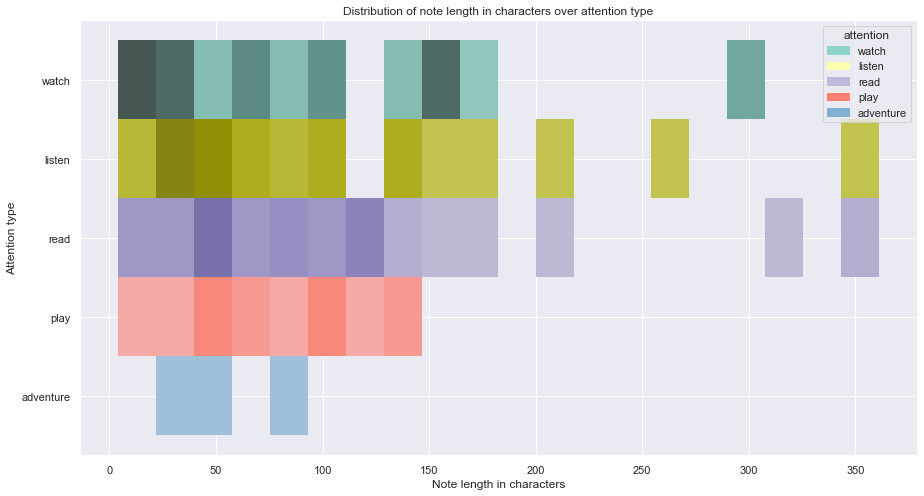

In [447]:
# Plotting the bar chart of the distribution of the note length without 0 values
df_note_length["attention"] = pd.Categorical(df_note_length["attention"], ["watch", "listen", "read", "play", "adventure"])
sns.histplot(data=df_note_length,x="note_length", y="attention", bins=20, kde=True, hue="attention", palette="Set3").set(title="Distribution of note length in characters over attention type",xlabel="Note length in characters",ylabel="Attention type")

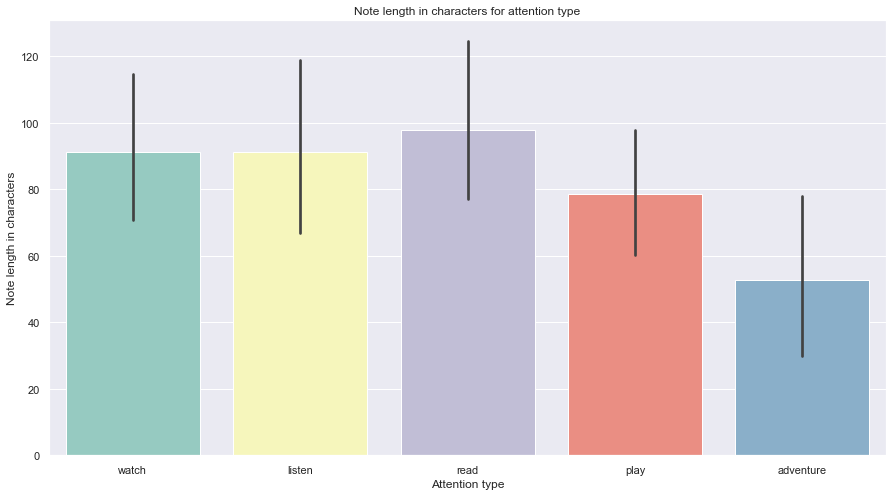

In [448]:
# Plotting the bar chart
ax = sns.barplot(data=df_note_length,x="attention",y="note_length", palette="Set3").set(title="Note length in characters for attention type",xlabel="Attention type",ylabel="Note length in characters")

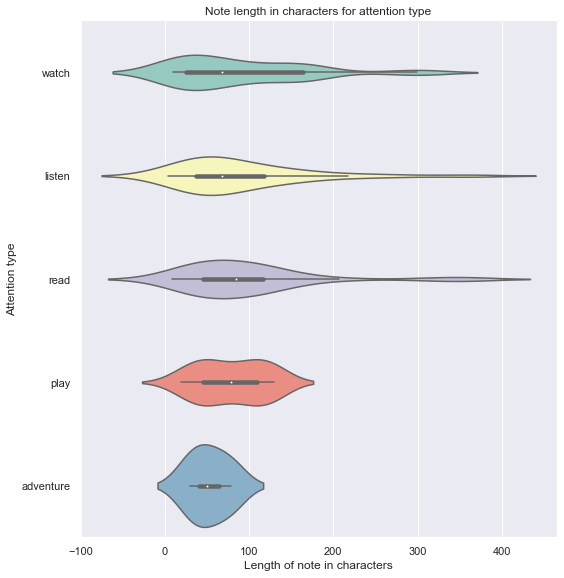

In [449]:
g = sns.catplot(x="note_length", y="attention", kind="violin", color="skyblue", height=8, aspect=1, data=df_note_length, palette="Set3")
#sns.swarmplot(x="note_length", y="attention", color="black", size=2, data=df, ax=g.ax)
plt.xlabel("Length of note in characters") 
plt.ylabel("Attention type")
plt.title("Note length in characters for attention type")
sns.set(rc = {"figure.figsize":(15,8)})


From the violin plot it becomes apparent, that there are more personal notes for recommendations of the attention span category "watch", the length of the personal note ranges between 0 and 100 characters on average. For recommendations of the category "read" or "listen" there are less available personal notes. The ones that are there, have longer personal notes.

### 3.3 Number of tags
Tags act as a connection between the item and the user and their frequent usage shows the interest of a user towards the item (Zheng & Li, 2011). Milicevic et al. (2010) argue that tagging is an important parameter in exposing user's preferences. Therefore, the number of tags used for each recommendation is being counted.

In [450]:
# Getting the number of tags seperated by a comma
df["tags_length"] = df.tags.str.count(",")+1
df.loc[df["tags"] == "None", "tags_length"] = 0
df["tags_length"].fillna(0, inplace = True)

df.head(3)


,roco_id,sender_id,recipient_id,date_and_time,started,finished,liked_it?,feedback,title,media_type,link,notes,tags,creator,duration_in_min,attention,note_length,tags_length
0,vWiiDYtumjRfptooiugKmGskJ6pCrSgD,2,0,"June 20, 2022 12:45 PM",No,No,NaN,NaN,Vespa Caravan,video,https://youtu.be/wzGYiUVkqqM,It’s even blue,video,NaN,NaN,watch,14.0,1.0
1,43YLNwT1sBViNUXzmyWNiQR1Id7agOEO,2,0,"June 8, 2022 6:57 PM",No,No,NaN,NaN,Keyword Surfer - Browser Extension,website,https://chrome.google.com/webstore/detail/keyw...,Lets you browse keywords as you search and dis...,"data, entrepreneur, marketing, research, start-up",NaN,NaN,read,84.0,5.0
2,tu7Orc5WEEowMDDlQJhx7IyLm9GR2V6g,2,0,"June 1, 2022 10:09 AM",No,No,NaN,NaN,Good News Podcast,podcast,https://pca.st/podcast/9c2dfda0-bb85-0135-9e60...,NaN,NaN,Cards against Humanity,NaN,listen,0.0,0.0


In [451]:
df["tags_length"].describe()

count    191.000000
mean       1.753927
std        1.634230
min        0.000000
25%        1.000000
50%        1.000000
75%        3.000000
max        7.000000
Name: tags_length, dtype: float64

[Text(0.5, 1.0, 'Distribution of tags used over recommendations'),
 Text(0.5, 0, 'Number of tags used'),
 Text(0, 0.5, 'Number of recommendations')]

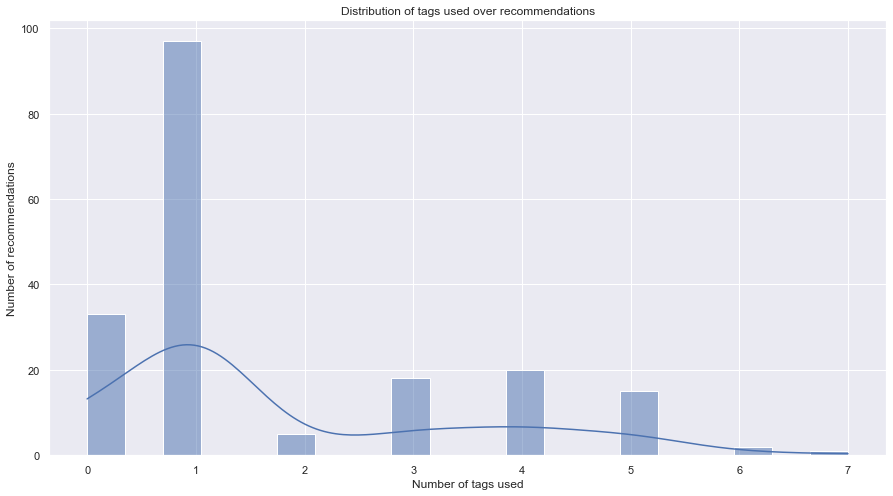

In [452]:
# Plotting the bar chart of the distribution of the tags length
sns.histplot(data=df,x="tags_length", bins=20, kde=True).set(title="Distribution of tags used over recommendations",xlabel="Number of tags used",ylabel="Number of recommendations")

The distribution of tag length is skewed right. There is a concentration of data at 1 to 2 tags and a long tail to the right. The vast majority of entries contain only one tag and very few entries contains more than 7 tags. The data range from 0 to 7 tags, so the approximate range equals 7 tags.
Next, the distribution of tags length will be analyzed over the attention type.

In [453]:
# Getting information on the number, the mean, min, max, and quartiles of the tags over attention type
df_tags_length = df[["tags_length", "attention"]]
df_tags_length.groupby(["attention"]).describe()

tags_length                                              
                    count      mean       std  min  25%  50%   75%  max
attention                                                              
watch                74.0  2.256757  1.728574  0.0  1.0  1.0  4.00  7.0
listen               38.0  1.157895  1.284551  0.0  0.0  1.0  1.00  5.0
read                 53.0  1.566038  1.538099  0.0  1.0  1.0  2.00  5.0
play                 19.0  1.894737  1.760516  0.0  1.0  1.0  3.00  6.0
adventure             3.0  1.333333  1.527525  0.0  0.5  1.0  2.00  3.0
no_media_type         4.0  0.250000  0.500000  0.0  0.0  0.0  0.25  1.0

In [454]:
# Getting the median of number of tags in characters for each attention type
df_tags_length.groupby(["attention"]).median()

,tags_length
attention,
watch,1.0
listen,1.0
read,1.0
play,1.0
adventure,1.0
no_media_type,0.0


[Text(0.5, 1.0, 'Distribution of tags used over attention type'),
 Text(0.5, 0, 'Number of tags'),
 Text(0, 0.5, 'Attention type')]

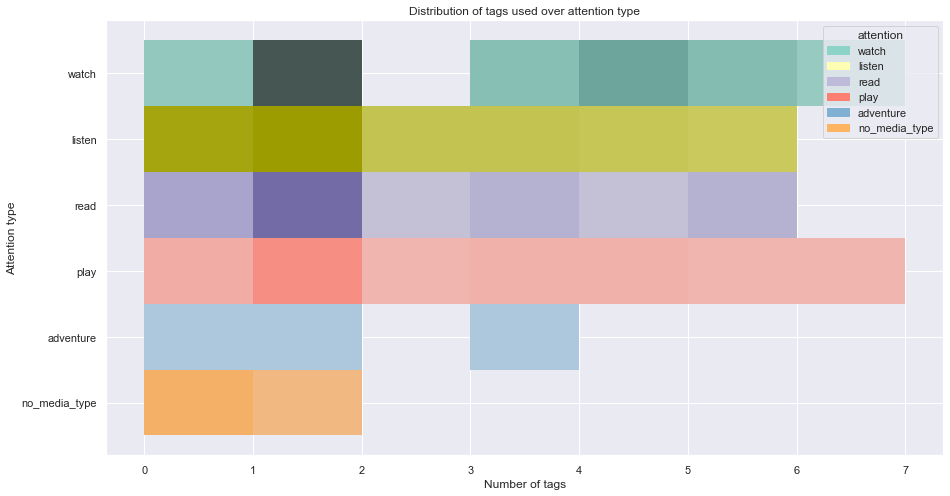

In [455]:
# Plotting the bar chart of the distribution of the tags length
sns.histplot(data=df,x="tags_length", y="attention", bins=7, kde=True, hue="attention", palette="Set3").set(title="Distribution of tags used over attention type",xlabel="Number of tags",ylabel="Attention type")

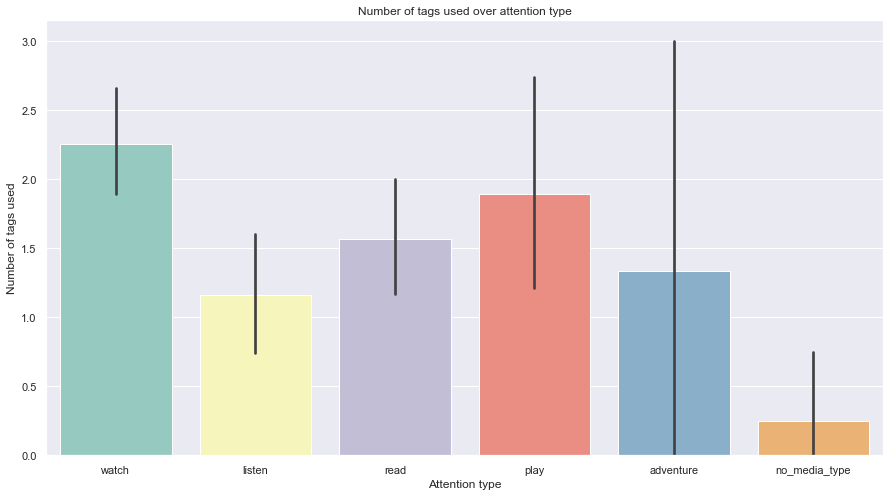

In [456]:
# Plotting the bar chart
ax = sns.barplot(data=df,x="attention",y="tags_length", palette="Set3").set(title="Number of tags used over attention type",xlabel="Attention type",ylabel="Number of tags used")

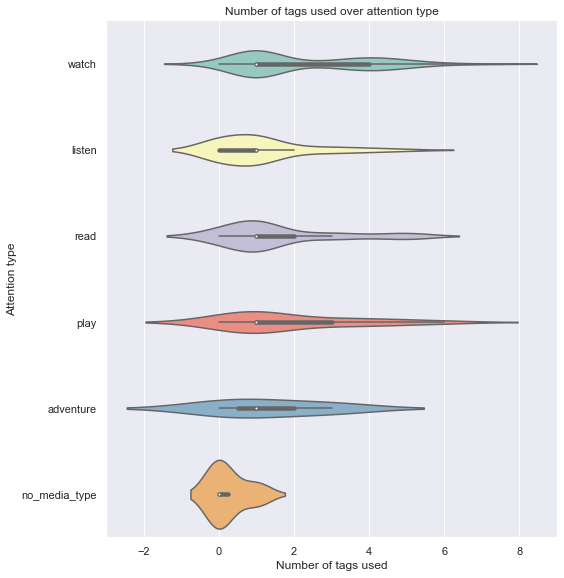

In [457]:
g = sns.catplot(x="tags_length", y="attention", kind="violin", palette="Set3", height=8, aspect=1, data=df)
#sns.swarmplot(x="note_length", y="attention", color="black", size=2, data=df, ax=g.ax)
plt.xlabel("Number of tags used") 
plt.ylabel("Attention type")
plt.title("Number of tags used over attention type")
sns.set(rc = {"figure.figsize":(15,8)})

The data shows that media types with the attention type watch get the most tags. While the median is almost the same for every attention type, the first and third quartile differ for the attention types, with categories such as watch and play having bigger quartiles that strech out more.

### 3.4 Length of feedback
Pagano & Maalej (2013) researched helpfulness of feedback by its length and found that feedback with low helpfulness is the shortest. Therefore, the feedback that has been given by the recipient of the recommendation will be assessed in single characters.

In [458]:
# Getting the length of the feedback in characters
df["feedback_length"] = df["feedback"].str.len()
df.loc[df["feedback"] == "None", "feedback_length"] = 0
df["feedback_length"].fillna(0, inplace = True)

df.head(3)

,roco_id,sender_id,recipient_id,date_and_time,started,finished,liked_it?,feedback,title,media_type,link,notes,tags,creator,duration_in_min,attention,note_length,tags_length,feedback_length
0,vWiiDYtumjRfptooiugKmGskJ6pCrSgD,2,0,"June 20, 2022 12:45 PM",No,No,NaN,NaN,Vespa Caravan,video,https://youtu.be/wzGYiUVkqqM,It’s even blue,video,NaN,NaN,watch,14.0,1.0,0.0
1,43YLNwT1sBViNUXzmyWNiQR1Id7agOEO,2,0,"June 8, 2022 6:57 PM",No,No,NaN,NaN,Keyword Surfer - Browser Extension,website,https://chrome.google.com/webstore/detail/keyw...,Lets you browse keywords as you search and dis...,"data, entrepreneur, marketing, research, start-up",NaN,NaN,read,84.0,5.0,0.0
2,tu7Orc5WEEowMDDlQJhx7IyLm9GR2V6g,2,0,"June 1, 2022 10:09 AM",No,No,NaN,NaN,Good News Podcast,podcast,https://pca.st/podcast/9c2dfda0-bb85-0135-9e60...,NaN,NaN,Cards against Humanity,NaN,listen,0.0,0.0,0.0


In [459]:
# Looking at the distribution of the feedback length
df["feedback_length"].describe()

count    191.000000
mean      18.026178
std       48.465662
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      265.000000
Name: feedback_length, dtype: float64

[Text(0.5, 1.0, 'Distribution of feedback length in characters over recommendations'),
 Text(0.5, 0, 'Feedback length in characters'),
 Text(0, 0.5, 'Number of recommendations')]

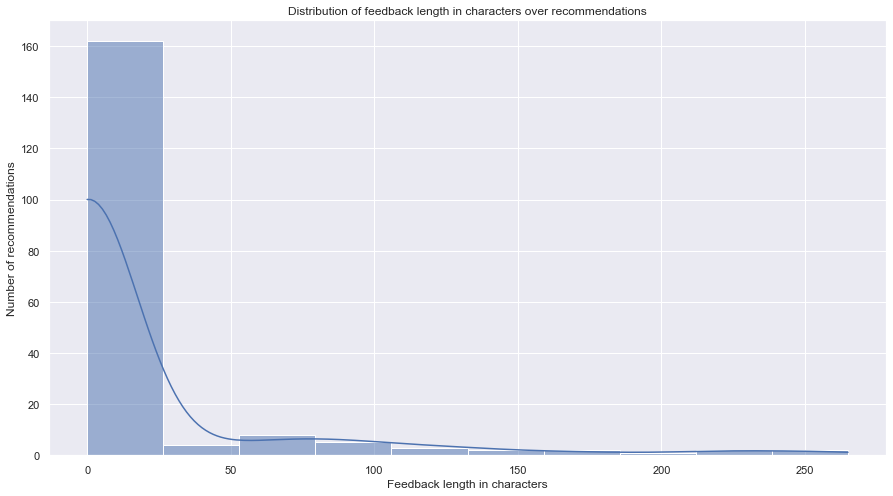

In [460]:
# Plotting the bar chart of the distribution of the feedback length
sns.histplot(data=df,x="feedback_length", bins=10, kde=True).set(title="Distribution of feedback length in characters over recommendations",xlabel="Feedback length in characters",ylabel="Number of recommendations")

Over 160 enries do not contain any feedback and make it harder to look at the entries that actually do contain feedback. In the following, only entries that contain feedback will be analyzed.

In [461]:
# Removing entries where no feedback is given and saving in a new dataframe
df_feedback_length = df[["feedback_length", "attention"]]
df_feedback_length = df_feedback_length[df_feedback_length["feedback_length"]!=0]
df_feedback_length.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 7 to 210
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   feedback_length  37 non-null     float64 
 1   attention        37 non-null     category
dtypes: category(1), float64(1)
memory usage: 849.0 bytes


In [462]:
# Looking at the distribution of the feedback length without 0 values
df_feedback_length["feedback_length"].describe()

count     37.000000
mean      93.054054
std       72.259927
min        8.000000
25%       33.000000
50%       78.000000
75%      123.000000
max      265.000000
Name: feedback_length, dtype: float64

[Text(0.5, 1.0, 'Distribution of feedback length in characters over recommendations'),
 Text(0.5, 0, 'Feedback length in characters'),
 Text(0, 0.5, 'Number of recommendations')]

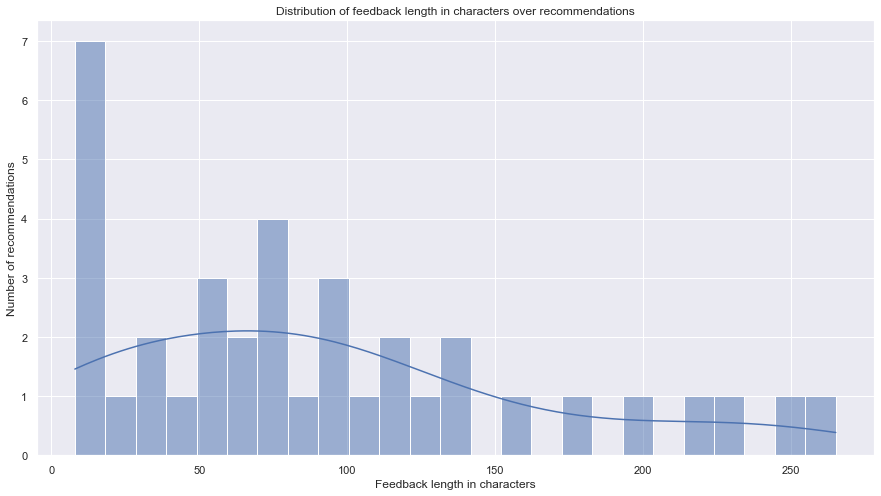

In [463]:
# Plotting the bar chart of the distribution of the feedback length without 0 values
sns.histplot(data=df_feedback_length,x="feedback_length", bins=25, kde=True).set(title="Distribution of feedback length in characters over recommendations",xlabel="Feedback length in characters",ylabel="Number of recommendations")

The distribution of feedback length is skewed right. There is a concentration of data at around 75 characters and a long tail to the right. The vast majority of feedback that is given contains the lowest number of characters and very few feedback contains more than 150 characters. The data range from 8 to 265 characters, so the approximate range equals 265 - 8 = 157 characters.
Next, the distribution of feedback length over the attention type will be analyzed.

In [464]:
# Getting information on the number, the mean, min, max, and quartiles of the feedback length in characters over attention type
df_feedback_length.groupby(["attention"]).describe()

feedback_length                                            \
                        count        mean        std   min    25%   50%   
attention                                                                 
watch                    15.0   98.933333  74.488222   9.0  53.50  93.0   
listen                   12.0  100.083333  78.497780  17.0  45.50  73.5   
read                      7.0   88.285714  71.142379   8.0  34.50  77.0   
play                      2.0   53.500000  64.346717   8.0  30.75  53.5   
adventure                 1.0   33.000000        NaN  33.0  33.00  33.0   
no_media_type             0.0         NaN        NaN   NaN    NaN   NaN   

                              
                  75%    max  
attention                     
watch          117.50  265.0  
listen         142.00  250.0  
read           130.50  203.0  
play            76.25   99.0  
adventure       33.00   33.0  
no_media_type     NaN    NaN

In [465]:
# Getting the median of feedback length in characters for each attention type
df_feedback_length.groupby(["attention"]).median()

,feedback_length
attention,
watch,93.0
listen,73.5
read,77.0
play,53.5
adventure,33.0
no_media_type,NaN


[Text(0.5, 1.0, 'Distribution of feedback length in characters over attention type'),
 Text(0.5, 0, 'Feedback length in characters'),
 Text(0, 0.5, 'Attention type')]

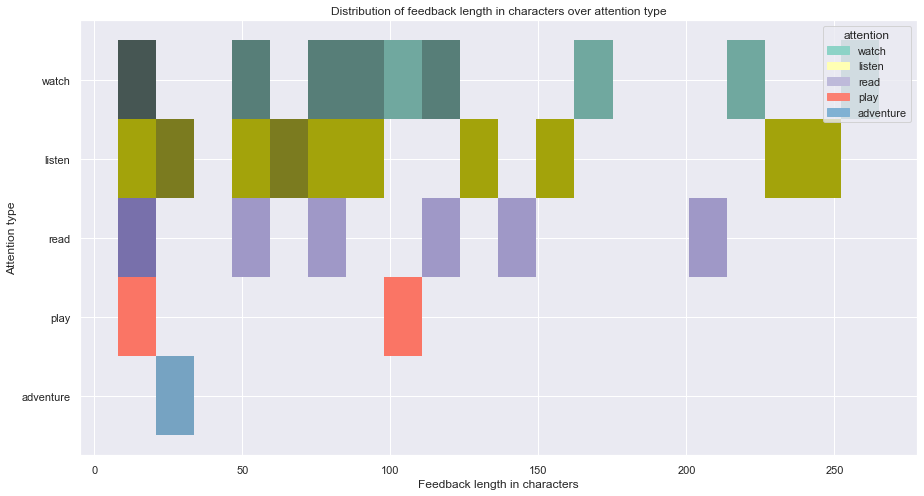

In [466]:
# Plotting the bar chart of the distribution of the feedback length without 0 values
df_feedback_length["attention"] = pd.Categorical(df_feedback_length["attention"], ["watch", "listen", "read", "play", "adventure"])
sns.histplot(data=df_feedback_length,x="feedback_length", y="attention", bins=20, kde=True, hue="attention", palette="Set3").set(title="Distribution of feedback length in characters over attention type",xlabel="Feedback length in characters",ylabel="Attention type")

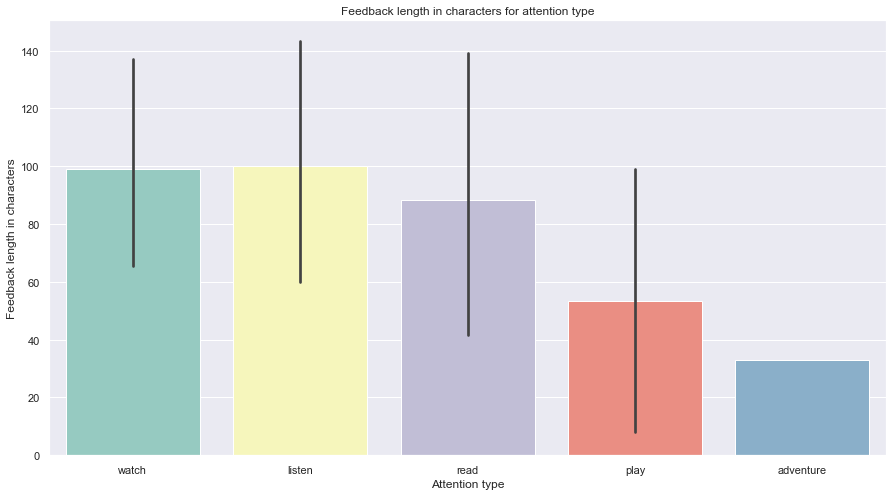

In [467]:
# Plotting the bar chart
ax = sns.barplot(data=df_feedback_length,x="attention",y="feedback_length", palette="Set3").set(title="Feedback length in characters for attention type",xlabel="Attention type",ylabel="Feedback length in characters")

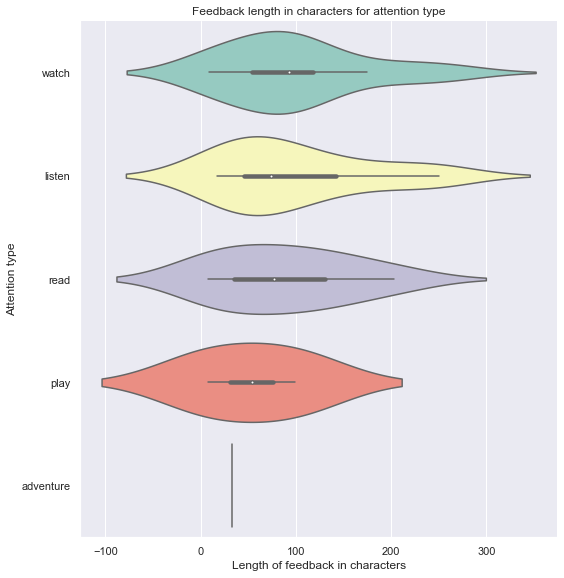

In [468]:
g = sns.catplot(x="feedback_length", y="attention", kind="violin", palette="Set3", height=8, aspect=1, data=df_feedback_length)
#sns.swarmplot(x="note_length", y="attention", color="black", size=2, data=df, ax=g.ax)
plt.xlabel("Length of feedback in characters") 
plt.ylabel("Attention type")
plt.title("Feedback length in characters for attention type")
sns.set(rc = {"figure.figsize":(15,8)})

The data shows that on average media types with the attention type listen get the longest feedback with the highest mean of 100 characters per feeback. The attention type watch, however, has the highest median and also the longest feedback in the data set. The attenttion types watch and listen have the highest occurrence with 15, and 13 occurances, respectively. The 3rd most reviewed attention type is listen with 7 occurrences, with a mean of 88 and a median of 77 characters per feedback.

### 3.5 Date and Time
To also be able to work with the timestamp data, the date and time will be split into two different columns. For the date, the weekday will be added, the time will be split in hours and minutes.

In [469]:
# Splitting date and time in two seperate columns
df["dates"] = pd.to_datetime(df["date_and_time"], errors="coerce").dt.date
df["time"] = pd.to_datetime(df["date_and_time"], errors="coerce").dt.time
df.head(3)

,roco_id,sender_id,recipient_id,date_and_time,started,finished,liked_it?,feedback,title,media_type,link,notes,tags,creator,duration_in_min,attention,note_length,tags_length,feedback_length,dates,time
0,vWiiDYtumjRfptooiugKmGskJ6pCrSgD,2,0,"June 20, 2022 12:45 PM",No,No,NaN,NaN,Vespa Caravan,video,https://youtu.be/wzGYiUVkqqM,It’s even blue,video,NaN,NaN,watch,14.0,1.0,0.0,2022-06-20,12:45:00
1,43YLNwT1sBViNUXzmyWNiQR1Id7agOEO,2,0,"June 8, 2022 6:57 PM",No,No,NaN,NaN,Keyword Surfer - Browser Extension,website,https://chrome.google.com/webstore/detail/keyw...,Lets you browse keywords as you search and dis...,"data, entrepreneur, marketing, research, start-up",NaN,NaN,read,84.0,5.0,0.0,2022-06-08,18:57:00
2,tu7Orc5WEEowMDDlQJhx7IyLm9GR2V6g,2,0,"June 1, 2022 10:09 AM",No,No,NaN,NaN,Good News Podcast,podcast,https://pca.st/podcast/9c2dfda0-bb85-0135-9e60...,NaN,NaN,Cards against Humanity,NaN,listen,0.0,0.0,0.0,2022-06-01,10:09:00


In [470]:
# Transforming Dates to datetime
df["dates"] = pd.to_datetime(df["dates"], errors="coerce")

Text(0, 0.5, 'Number of recommendations')

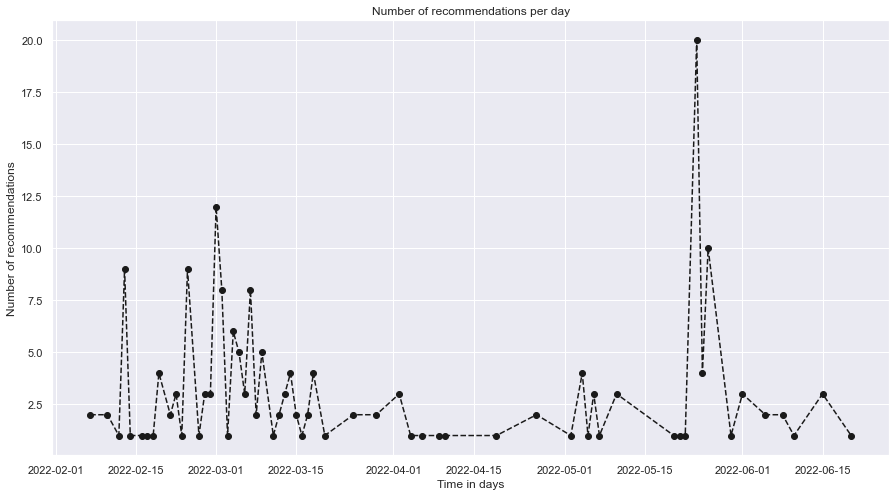

In [471]:
# Plotting the number of recommendations per day
df_groupedby_date = df.groupby("dates").count()
df_groupedby_date.reset_index(inplace=True)
plt.plot_date(x=df_groupedby_date["dates"], y=df_groupedby_date["roco_id"], linestyle="dashed", c="k")
plt.title("Number of recommendations per day")
plt.xlabel("Time in days")
plt.ylabel("Number of recommendations")

The graph shows the recommendations that have been sent per day. There is a peak at around the mid of May 2022, where 20 recommendations have been sent on a single day. Between the beginning of April until the beginning of May, there are less or even no recommendations sent.

In [472]:
# Transforming time into a string to process/split it
df["time"] = df["time"].astype("string")

In [473]:
# Splitting Time into "Hour" and "Minute"
df["hour"] = df["time"].str.split(':').str[0]
df["minute"] = df["time"].str.split(':').str[1]
df.head(3)

,roco_id,sender_id,recipient_id,date_and_time,started,finished,liked_it?,feedback,title,media_type,link,notes,tags,creator,duration_in_min,attention,note_length,tags_length,feedback_length,dates,time,hour,minute
0,vWiiDYtumjRfptooiugKmGskJ6pCrSgD,2,0,"June 20, 2022 12:45 PM",No,No,NaN,NaN,Vespa Caravan,video,https://youtu.be/wzGYiUVkqqM,It’s even blue,video,NaN,NaN,watch,14.0,1.0,0.0,2022-06-20,12:45:00,12,45
1,43YLNwT1sBViNUXzmyWNiQR1Id7agOEO,2,0,"June 8, 2022 6:57 PM",No,No,NaN,NaN,Keyword Surfer - Browser Extension,website,https://chrome.google.com/webstore/detail/keyw...,Lets you browse keywords as you search and dis...,"data, entrepreneur, marketing, research, start-up",NaN,NaN,read,84.0,5.0,0.0,2022-06-08,18:57:00,18,57
2,tu7Orc5WEEowMDDlQJhx7IyLm9GR2V6g,2,0,"June 1, 2022 10:09 AM",No,No,NaN,NaN,Good News Podcast,podcast,https://pca.st/podcast/9c2dfda0-bb85-0135-9e60...,NaN,NaN,Cards against Humanity,NaN,listen,0.0,0.0,0.0,2022-06-01,10:09:00,10,09


In [474]:
# Transforming "Hour" and "Time" into int
df["hour"] = pd.to_numeric(df["hour"])
df["minute"] = pd.to_numeric(df["minute"])
df.dtypes

roco_id                    object
sender_id                   int64
recipient_id                int64
date_and_time              object
started                    object
finished                   object
liked_it?                  object
feedback                   object
title                      object
media_type                 object
link                       object
notes                      object
tags                       object
creator                    object
duration_in_min           float64
attention                category
note_length               float64
tags_length               float64
feedback_length           float64
dates              datetime64[ns]
time                       string
hour                        int64
minute                      int64
dtype: object

In [475]:
# Grouping by hour, aggregating by sender ID, and saving it in the hour dataframe
df_hour = df.groupby("hour").agg({"sender_id":"count"}).reset_index()
df_hour

,hour,sender_id
0,0,6
1,4,1
2,8,1
3,9,2
4,10,9
5,11,12
6,12,14
7,13,10
8,14,14
9,15,23


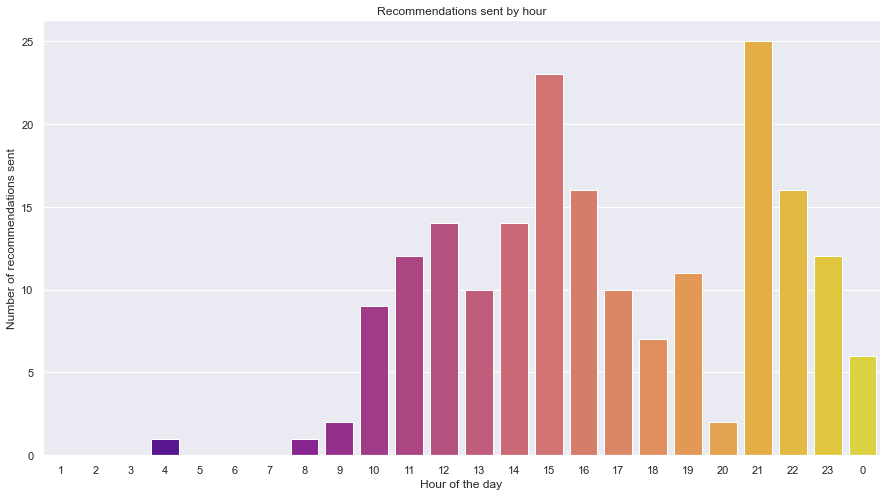

In [476]:
# Plotting the bar chart
order_list_hours = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,0]
ax = sns.barplot(data=df_hour,x="hour",y="sender_id", order=order_list_hours, palette="plasma").set(title="Recommendations sent by hour",xlabel="Hour of the day",ylabel="Number of recommendations sent")

The most popular time to send a recommendation is around 15:00 and around 21:00 o'clock.

In [477]:
# Adding weekday from the "Dates" row
df["weekday"] = df["dates"].dt.day_name()
df.head(3)

,roco_id,sender_id,recipient_id,date_and_time,started,finished,liked_it?,feedback,title,media_type,link,notes,tags,creator,duration_in_min,attention,note_length,tags_length,feedback_length,dates,time,hour,minute,weekday
0,vWiiDYtumjRfptooiugKmGskJ6pCrSgD,2,0,"June 20, 2022 12:45 PM",No,No,NaN,NaN,Vespa Caravan,video,https://youtu.be/wzGYiUVkqqM,It’s even blue,video,NaN,NaN,watch,14.0,1.0,0.0,2022-06-20,12:45:00,12,45,Monday
1,43YLNwT1sBViNUXzmyWNiQR1Id7agOEO,2,0,"June 8, 2022 6:57 PM",No,No,NaN,NaN,Keyword Surfer - Browser Extension,website,https://chrome.google.com/webstore/detail/keyw...,Lets you browse keywords as you search and dis...,"data, entrepreneur, marketing, research, start-up",NaN,NaN,read,84.0,5.0,0.0,2022-06-08,18:57:00,18,57,Wednesday
2,tu7Orc5WEEowMDDlQJhx7IyLm9GR2V6g,2,0,"June 1, 2022 10:09 AM",No,No,NaN,NaN,Good News Podcast,podcast,https://pca.st/podcast/9c2dfda0-bb85-0135-9e60...,NaN,NaN,Cards against Humanity,NaN,listen,0.0,0.0,0.0,2022-06-01,10:09:00,10,9,Wednesday


In [478]:
# Grouping by weekday, aggregating by sender ID, and saving it in the weekday dataframe
df_weekday = df.groupby("weekday").agg({"sender_id":"count"}).reset_index()
df_weekday

,weekday,sender_id
0,Friday,19
1,Monday,24
2,Saturday,19
3,Sunday,23
4,Thursday,26
5,Tuesday,47
6,Wednesday,33


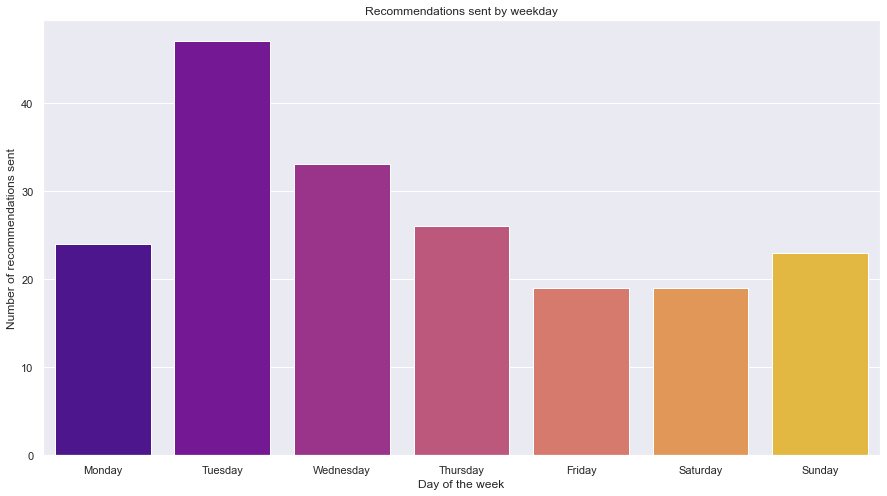

In [479]:
# Plotting the bar chart
order_list = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
ax = sns.barplot(data=df_weekday,x="weekday",y="sender_id", order=order_list, palette="plasma").set(title="Recommendations sent by weekday",xlabel="Day of the week",ylabel="Number of recommendations sent")

### 3.7 Creating dummy variables
To make the data set processable for the ML model, non-integer features will be transformed into dummy variables.

The weekday column gets transformed into dummy variables, giving each day of the week a corresponding number.

In [480]:
# Creating lists for conditions to create new columns
conditions_wd = [
    (df["weekday"] == "Monday"),
    (df["weekday"] == "Tuesday"),
    (df["weekday"] == "Wednesday"),
    (df["weekday"] == "Thursday"),
    (df["weekday"] == "Friday"),
    (df["weekday"] == "Saturday"),
    (df["weekday"] == "Sunday")
]

values = [1,2,3,4,5,6,7]

# create new columns with values based on predefined conditions
df["weekday_number"] = np.select(conditions_wd, values)
df.head(1)

,roco_id,sender_id,recipient_id,date_and_time,started,finished,liked_it?,feedback,title,media_type,link,notes,tags,creator,duration_in_min,attention,note_length,tags_length,feedback_length,dates,time,hour,minute,weekday,weekday_number
0,vWiiDYtumjRfptooiugKmGskJ6pCrSgD,2,0,"June 20, 2022 12:45 PM",No,No,NaN,NaN,Vespa Caravan,video,https://youtu.be/wzGYiUVkqqM,It’s even blue,video,NaN,NaN,watch,14.0,1.0,0.0,2022-06-20,12:45:00,12,45,Monday,1


The attention type column will be transformed into dummy variables as well.

In [481]:
# Creating dummy variables for attention span
dummies_attention = df["attention"].str.get_dummies()
df = pd.concat([df, dummies_attention], axis=1) 
df.head(3)

,roco_id,sender_id,recipient_id,date_and_time,started,finished,liked_it?,feedback,title,media_type,link,notes,tags,creator,duration_in_min,attention,note_length,tags_length,feedback_length,dates,time,hour,minute,weekday,weekday_number,adventure,listen,no_media_type,play,read,watch
0,vWiiDYtumjRfptooiugKmGskJ6pCrSgD,2,0,"June 20, 2022 12:45 PM",No,No,NaN,NaN,Vespa Caravan,video,https://youtu.be/wzGYiUVkqqM,It’s even blue,video,NaN,NaN,watch,14.0,1.0,0.0,2022-06-20,12:45:00,12,45,Monday,1,0,0,0,0,0,1
1,43YLNwT1sBViNUXzmyWNiQR1Id7agOEO,2,0,"June 8, 2022 6:57 PM",No,No,NaN,NaN,Keyword Surfer - Browser Extension,website,https://chrome.google.com/webstore/detail/keyw...,Lets you browse keywords as you search and dis...,"data, entrepreneur, marketing, research, start-up",NaN,NaN,read,84.0,5.0,0.0,2022-06-08,18:57:00,18,57,Wednesday,3,0,0,0,0,1,0
2,tu7Orc5WEEowMDDlQJhx7IyLm9GR2V6g,2,0,"June 1, 2022 10:09 AM",No,No,NaN,NaN,Good News Podcast,podcast,https://pca.st/podcast/9c2dfda0-bb85-0135-9e60...,NaN,NaN,Cards against Humanity,NaN,listen,0.0,0.0,0.0,2022-06-01,10:09:00,10,9,Wednesday,3,0,1,0,0,0,0


As title, media type, attention span, link, notes, tags, creator, duration, rating, and feedback are not given for all recommendations on the platform, they will be turned into dummy variables as well.

In [482]:
# Filling NaN values with string "None"
df["title"].fillna("None", inplace = True)
df["media_type"].fillna("None", inplace = True)
df["attention"].fillna("no_media_type", inplace = True)
df["link"].fillna("None", inplace = True)
df["notes"].fillna("None", inplace = True)
df["tags"].fillna("None", inplace = True)
df["creator"].fillna("None", inplace = True)
df["duration_in_min"].fillna("None", inplace = True)
df["liked_it?"].fillna("None", inplace = True)
df["feedback"].fillna("None", inplace = True)

In [483]:
# Creating lists for conditions to create new columns
conditions_ti = [
    (df["title"] == "None"),
    (df["title"] != "None")
]
conditions_mt = [
    (df["media_type"] == "None"),
    (df["media_type"] != "None")
]
conditions_a = [
    (df["attention"] == "no_media_type"),
    (df["attention"] != "no_media_type")
]
conditions_l = [
    (df["link"] == "None"),
    (df["link"] != "None")
]
conditions_n = [
    (df["notes"] == "None"),
    (df["notes"] != "None")
]
conditions_ta = [
    (df["tags"] == "None"),
    (df["tags"] != "None")
]
conditions_c = [
    (df["creator"] == "None"),
    (df["creator"] != "None")
]
conditions_d = [
    (df["duration_in_min"] == "None"),
    (df["duration_in_min"] != "None")
]
conditions_r = [
    (df["liked_it?"] == "None"),
    (df["liked_it?"] != "None")
]
conditions_rn = [
    (df["liked_it?"] == "None"),
    (df["liked_it?"] == "⭐️"),
    (df["liked_it?"] == "⭐️⭐️"),
    (df["liked_it?"] == "⭐️⭐️⭐️"),
    (df["liked_it?"] == "⭐️⭐️⭐️⭐️"),
    (df["liked_it?"] == "⭐️⭐️⭐️⭐️⭐️")
]
conditions_r1 = [
    (df["liked_it?"] != "⭐️"),
    (df["liked_it?"] == "⭐️")
]
conditions_r2 = [
    (df["liked_it?"] != "⭐️⭐️"),
    (df["liked_it?"] == "⭐️⭐️")
]
conditions_r3 = [
    (df["liked_it?"] != "⭐️⭐️⭐️"),
    (df["liked_it?"] == "⭐️⭐️⭐️")
]
conditions_r4 = [
    (df["liked_it?"] != "⭐️⭐️⭐️⭐️"),
    (df["liked_it?"] == "⭐️⭐️⭐️⭐️")
]
conditions_r5 = [
    (df["liked_it?"] != "⭐️⭐️⭐️⭐️⭐️"),
    (df["liked_it?"] == "⭐️⭐️⭐️⭐️⭐️")
]
conditions_f = [
    (df["feedback"] == "None"),
    (df["feedback"] != "None")
]
conditions_started = [
    (df["started"] == "No"),
    (df["started"] == "Yes")
]
conditions_finished = [
    (df["finished"] == "No"),
    (df["finished"] == "Yes")
]

values = [0,1]
values_rating = [0,1,2,3,4,5]

# create new columns with values based on predefined conditions
df["title_given"] = np.select(conditions_ti, values)
df["media_type_given"] = np.select(conditions_mt, values)
df["attention_given"] = np.select(conditions_mt, values)
df["link_given"] = np.select(conditions_l, values)
df["note_given"] = np.select(conditions_n, values)
df["tags_given"] = np.select(conditions_ta, values)
df["creator_given"] = np.select(conditions_c, values)
df["duration_given"] = np.select(conditions_d, values)
df["rating_given"] = np.select(conditions_r, values)
df["rating_numbers"] = np.select(conditions_rn, values_rating)
df["rating_1"] = np.select(conditions_r1, values)
df["rating_2"] = np.select(conditions_r2, values)
df["rating_3"] = np.select(conditions_r3, values)
df["rating_4"] = np.select(conditions_r4, values)
df["rating_5"] = np.select(conditions_r5, values)
df["feedback_given"] = np.select(conditions_f, values)
df["started"] = np.select(conditions_started, values)
df["finished"] = np.select(conditions_finished, values)

df.head(3)

,roco_id,sender_id,recipient_id,date_and_time,started,finished,liked_it?,feedback,title,media_type,link,notes,tags,creator,duration_in_min,attention,note_length,tags_length,feedback_length,dates,time,hour,minute,weekday,weekday_number,adventure,listen,no_media_type,play,read,watch,title_given,media_type_given,attention_given,link_given,note_given,tags_given,creator_given,duration_given,rating_given,rating_numbers,rating_1,rating_2,rating_3,rating_4,rating_5,feedback_given
0,vWiiDYtumjRfptooiugKmGskJ6pCrSgD,2,0,"June 20, 2022 12:45 PM",0,0,None,None,Vespa Caravan,video,https://youtu.be/wzGYiUVkqqM,It’s even blue,video,None,None,watch,14.0,1.0,0.0,2022-06-20,12:45:00,12,45,Monday,1,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0
1,43YLNwT1sBViNUXzmyWNiQR1Id7agOEO,2,0,"June 8, 2022 6:57 PM",0,0,None,None,Keyword Surfer - Browser Extension,website,https://chrome.google.com/webstore/detail/keyw...,Lets you browse keywords as you search and dis...,"data, entrepreneur, marketing, research, start-up",None,None,read,84.0,5.0,0.0,2022-06-08,18:57:00,18,57,Wednesday,3,0,0,0,0,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0
2,tu7Orc5WEEowMDDlQJhx7IyLm9GR2V6g,2,0,"June 1, 2022 10:09 AM",0,0,None,None,Good News Podcast,podcast,https://pca.st/podcast/9c2dfda0-bb85-0135-9e60...,None,None,Cards against Humanity,None,listen,0.0,0.0,0.0,2022-06-01,10:09:00,10,9,Wednesday,3,0,1,0,0,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0


### 3.8 Rating
A rating can be given to a recommendation from 1 to 5 stars.

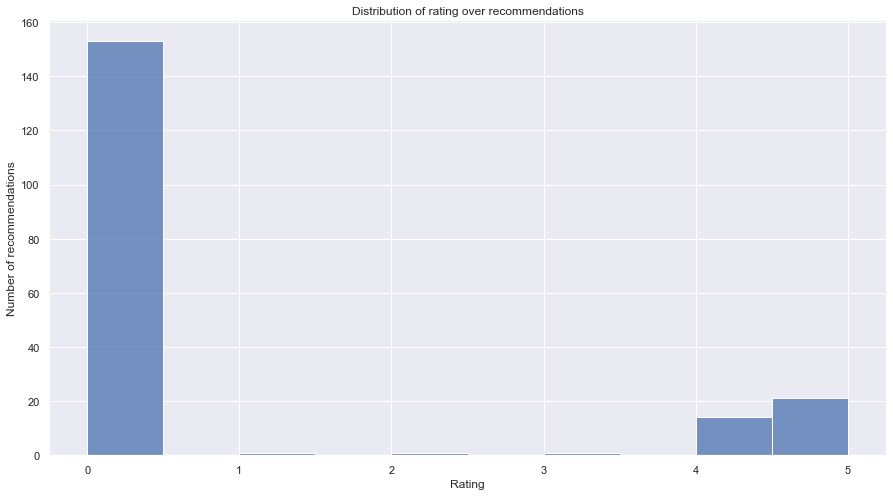

In [484]:
# Plotting the bar chart of the distribution of the ratings
ax = sns.histplot(data=df,x="rating_numbers", bins=10).set(title="Distribution of rating over recommendations",xlabel="Rating",ylabel="Number of recommendations")

In [485]:
# Creating data frame for rating
df_rating = df[["rating_numbers", "attention"]]
count = (df_rating["rating_numbers"] == 0).sum()
print("There are",count,"recommendations with no rating.")


There are 153 recommendations with no rating.


Due to the process of giving feedback on the platform, it is only possible to give a rating from 1 to 5 stars. The 0 values indicate, that there was no rating given.
There are 153 entries with no rating. To make the analysis informative, only recommendations that received a rating will be looked at more in-depth in the following.

In [486]:
# Removing entries where no rating is given and saving in a new dataframe
df_rating = df_rating[df_rating["rating_numbers"]!=0]
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 7 to 215
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   rating_numbers  38 non-null     int64   
 1   attention       38 non-null     category
dtypes: category(1), int64(1)
memory usage: 866.0 bytes


In [487]:
# Looking at the distribution of the rating without 0 values
df_rating["rating_numbers"].describe()

count    38.000000
mean      4.394737
std       0.886520
min       1.000000
25%       4.000000
50%       5.000000
75%       5.000000
max       5.000000
Name: rating_numbers, dtype: float64

[Text(0.5, 1.0, 'Distribution of rating over recommendations'),
 Text(0.5, 0, 'Rating'),
 Text(0, 0.5, 'Number of recommendations')]

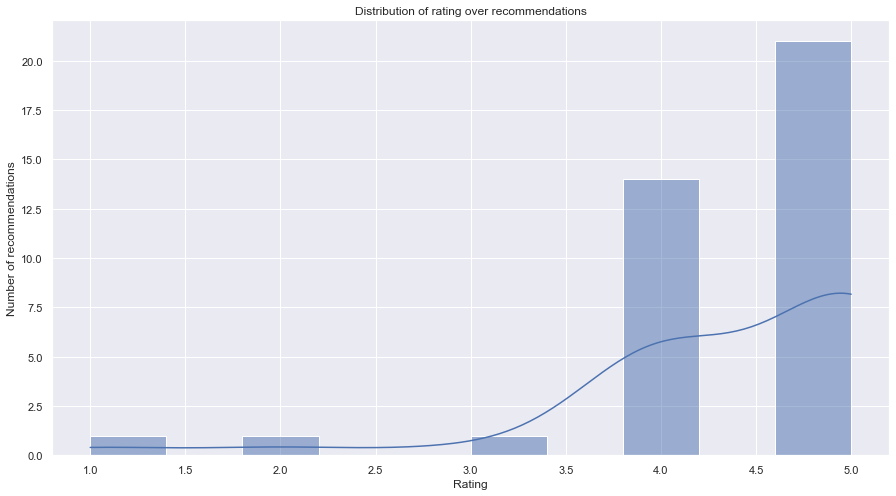

In [488]:
# Plotting the bar chart of the distribution of the ratings
sns.histplot(data=df_rating,x="rating_numbers", bins=10, kde=True).set(title="Distribution of rating over recommendations",xlabel="Rating",ylabel="Number of recommendations")

In [489]:
# Getting information on the number, the mean, min, max, and quartiles of the rating over attention type
df_rating.groupby(["attention"]).describe()

rating_numbers                                          
                       count  mean       std  min   25%  50%  75%  max
attention                                                             
watch                   16.0  4.25  1.064581  1.0  4.00  4.5  5.0  5.0
listen                  12.0  4.25  0.866025  2.0  4.00  4.0  5.0  5.0
read                     8.0  4.75  0.462910  4.0  4.75  5.0  5.0  5.0
play                     2.0  5.00  0.000000  5.0  5.00  5.0  5.0  5.0
adventure                0.0   NaN       NaN  NaN   NaN  NaN  NaN  NaN
no_media_type            0.0   NaN       NaN  NaN   NaN  NaN  NaN  NaN

In [490]:
# Getting the median of rating for each attention type
df_rating.groupby(["attention"]).median()

,rating_numbers
attention,
watch,4.5
listen,4.0
read,5.0
play,5.0
adventure,NaN
no_media_type,NaN


[Text(0.5, 1.0, 'Distribution of rating over attention type'),
 Text(0.5, 0, 'Rating'),
 Text(0, 0.5, 'Attention type')]

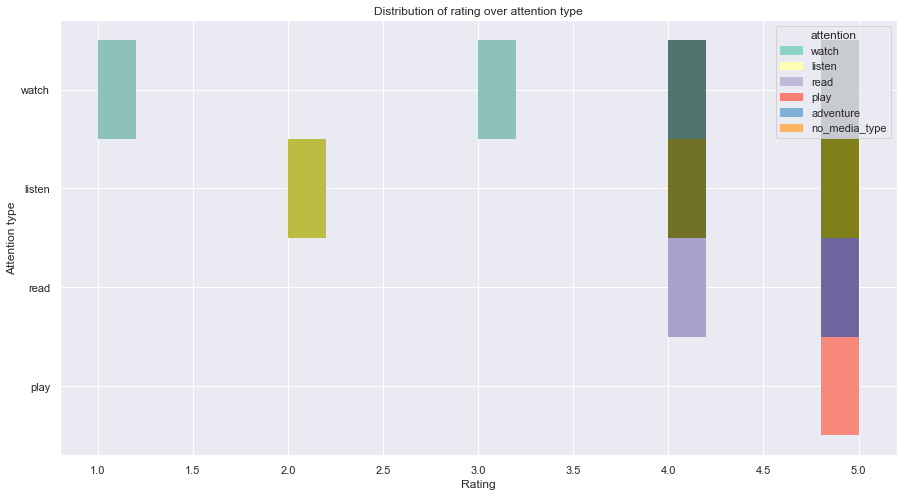

In [491]:
# Plotting the bar chart of the distribution of the feedback length without 0 values
sns.histplot(data=df_rating,x="rating_numbers", y="attention", bins=20, kde=True, hue="attention", palette="Set3").set(title="Distribution of rating over attention type",xlabel="Rating",ylabel="Attention type")

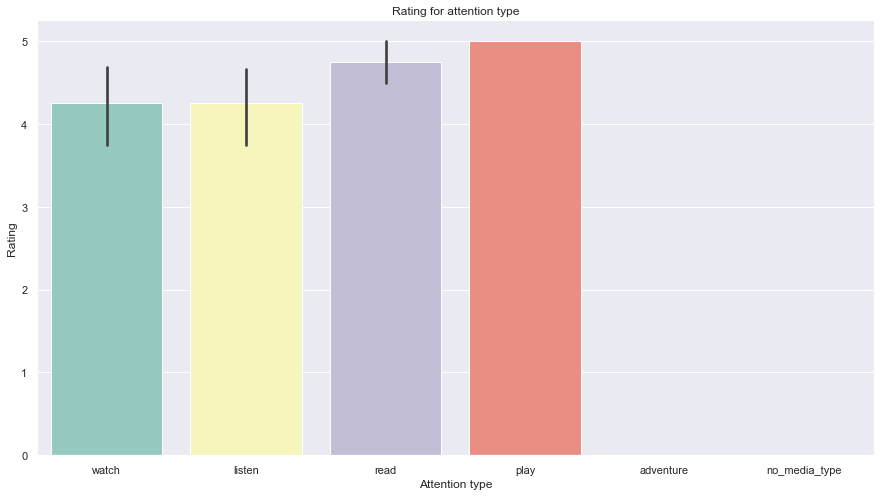

In [492]:
# Plotting the bar chart
ax = sns.barplot(data=df_rating,x="attention",y="rating_numbers", palette="Set3").set(title="Rating for attention type",xlabel="Attention type",ylabel="Rating")

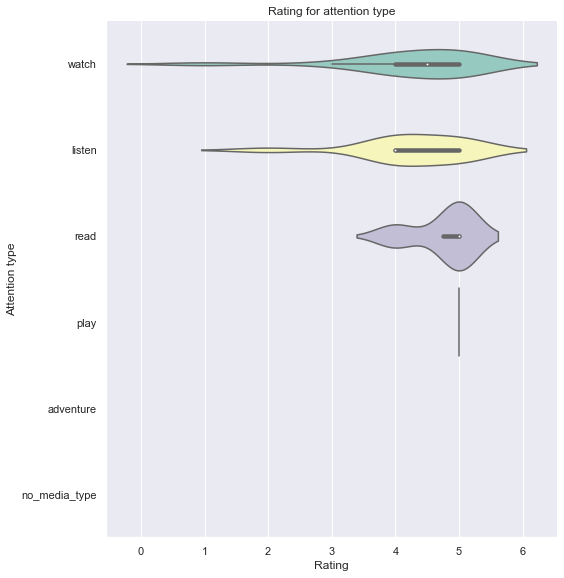

In [493]:
g = sns.catplot(x="rating_numbers", y="attention", kind="violin", palette="Set3", height=8, aspect=1, data=df_rating)
#sns.swarmplot(x="note_length", y="attention", color="black", size=2, data=df, ax=g.ax)
plt.xlabel("Rating") 
plt.ylabel("Attention type")
plt.title("Rating for attention type")
sns.set(rc = {"figure.figsize":(15,8)})

Looking at the mean, the attention type play has the highest rating, but it also only has 2 entries in the data set.

### 3.9 Indication of interaction
Users on the platform can manually indicate their level of interaction with a recommendation and let the sender know if they already started or finished interacting with the item.

In [494]:
# Checking how many recommendations are indicated as started
df["started"].value_counts()

0    149
1     42
Name: started, dtype: int64

In [495]:
# Checking how many recommendations are indicated as finished
df["finished"].value_counts()

0    154
1     37
Name: finished, dtype: int64

More recommendations got started than finished.

In [496]:
# Changing from object to int
df["started"] = df["started"].astype("int")
df["finished"] = df["finished"].astype("int")

df.dtypes

roco_id                     object
sender_id                    int64
recipient_id                 int64
date_and_time               object
started                      int64
finished                     int64
liked_it?                   object
feedback                    object
title                       object
media_type                  object
link                        object
notes                       object
tags                        object
creator                     object
duration_in_min             object
attention                 category
note_length                float64
tags_length                float64
feedback_length            float64
dates               datetime64[ns]
time                        string
hour                         int64
minute                       int64
weekday                     object
weekday_number               int64
adventure                    int64
listen                       int64
no_media_type                int64
play                

## 4 Descriptive analysis
For the data analysis part, only the columns that will later be used for the ML model will be selected. Therefore, a subset dataframe will be created to work in.
This dataframe now contains information on:
- whether feedback was given (0 = No, 1 = Yes)
- the length of the feedback in characters (0 to 265 characters)
- whether a rating was given (0 = No, 1 = Yes)
- which rating was given (0 = None to 5 = 5 stars)
- whether a 1 star rating was given (0 = No, 1 = Yes)
- whether a 2 star rating was given (0 = No, 1 = Yes)
- whether a 3 star rating was given (0 = No, 1 = Yes)
- whether a 4 star rating was given (0 = No, 1 = Yes)
- whether a 5 star rating was given (0 = No, 1 = Yes)
- whether a personal note was given (0 = No, 1 = Yes)
- the length of the note in characters (0 to 361 characters)
- the sender ID (unique user ID from 0 to 37)
- the recipient ID (unique user ID from 0 to 44)
- whether an item was started (0 = No, 1 = Yes)
- whether an item was finished (0 = No, 1 = Yes)
- whether a title was given (0 = No, 1 = Yes)
- whether a link was given (0 = No, 1 = Yes)
- whether tags were given (0 = No, 1 = Yes)
- the length of the tags in words (0 to 7 tags)
- whether a creator was given (0 = No, 1 = Yes)
- whether a duration was given (0 = No, 1 = Yes)
- the hour when the recommendation was sent
- the minute the recommendation was sent
- the number of the weekday (1 = Monday to 7 = Sunday)
- whether it was an item of the attention type "Adventure" (0 = No, 1 = Yes)
- whether it was an item of the attention type "Listen" (0 = No, 1 = Yes)
- whether it was an item of the attention type "Play" (0 = No, 1 = Yes)
- whether it was an item of the attention type "Read" (0 = No, 1 = Yes)
- whether it was an item of the attention type "Watch" (0 = No, 1 = Yes)
- whether it was an item with no attention type given (0 = No, 1 = Yes)

In [497]:
# Subsetting the data set for ML model
new_df = df[["feedback_given", "feedback_length", "rating_given", "rating_numbers", "rating_1", "rating_2", "rating_3", "rating_4", "rating_5", "note_given", "tags_given", "note_length", "sender_id", "recipient_id", "started", "finished", "title_given", "link_given", "tags_length", "creator_given", "duration_given", "hour", "minute", "weekday_number", "adventure", "listen", "play", "read", "watch", "no_media_type"]]
new_df.head(3)

,feedback_given,feedback_length,rating_given,rating_numbers,rating_1,rating_2,rating_3,rating_4,rating_5,note_given,tags_given,note_length,sender_id,recipient_id,started,finished,title_given,link_given,tags_length,creator_given,duration_given,hour,minute,weekday_number,adventure,listen,play,read,watch,no_media_type
0,0,0.0,0,0,0,0,0,0,0,1,1,14.0,2,0,0,0,1,1,1.0,0,0,12,45,1,0,0,0,0,1,0
1,0,0.0,0,0,0,0,0,0,0,1,1,84.0,2,0,0,0,1,1,5.0,0,0,18,57,3,0,0,0,1,0,0
2,0,0.0,0,0,0,0,0,0,0,0,0,0.0,2,0,0,0,1,1,0.0,1,0,10,9,3,0,1,0,0,0,0


In [498]:
# Subsetting the data set for correlation analysis, here feedback given, rating given, the dummy variables for the rating, note given, and tags given are missing, as there is already variables that express information about them
corr_df = df[["feedback_length", "rating_numbers", "note_length", "sender_id", "recipient_id", "started", "finished", "title_given", "link_given", "tags_length", "creator_given", "duration_given", "hour", "minute", "weekday_number", "adventure", "listen", "play", "read", "watch", "no_media_type"]]
corr_df.head(3)

,feedback_length,rating_numbers,note_length,sender_id,recipient_id,started,finished,title_given,link_given,tags_length,creator_given,duration_given,hour,minute,weekday_number,adventure,listen,play,read,watch,no_media_type
0,0.0,0,14.0,2,0,0,0,1,1,1.0,0,0,12,45,1,0,0,0,0,1,0
1,0.0,0,84.0,2,0,0,0,1,1,5.0,0,0,18,57,3,0,0,0,1,0,0
2,0.0,0,0.0,2,0,0,0,1,1,0.0,1,0,10,9,3,0,1,0,0,0,0


In [499]:
# Create correlation matrix
corr = corr_df.corr()
corr

,feedback_length,rating_numbers,note_length,sender_id,recipient_id,started,finished,title_given,link_given,tags_length,creator_given,duration_given,hour,minute,weekday_number,adventure,listen,play,read,watch,no_media_type
feedback_length,1.000000,0.648409,0.130992,-0.001788,-0.054280,0.594124,0.659121,0.047108,0.082927,-0.081586,0.095936,0.135350,-0.115733,0.070438,0.007517,-0.018361,0.139998,-0.085222,-0.081613,0.033363,-0.054540
rating_numbers,0.648409,1.000000,0.048420,0.071578,0.087093,0.860020,0.837693,0.061453,0.108180,-0.080256,0.084954,0.176229,-0.042569,0.152370,-0.016868,-0.061453,0.129703,-0.064359,-0.054261,0.019723,-0.071150
note_length,0.130992,0.048420,1.000000,-0.018426,-0.075079,-0.022037,0.007211,0.115753,0.180581,0.066495,0.155574,0.010102,0.014627,0.068206,0.110137,-0.029039,0.026232,-0.053527,0.073444,-0.013793,-0.118767
sender_id,-0.001788,0.071578,-0.018426,1.000000,0.111182,0.116981,0.159224,-0.207052,-0.208104,0.084277,0.203542,0.068494,-0.124058,-0.040340,0.072423,-0.007453,0.075872,0.112708,-0.173746,0.021098,0.030881
recipient_id,-0.054280,0.087093,-0.075079,0.111182,1.000000,0.085683,0.088787,-0.119831,-0.035318,-0.080481,0.046442,0.075735,-0.086299,-0.050483,-0.021718,0.029133,0.006175,-0.087253,0.015731,0.015580,0.037667
started,0.594124,0.860020,-0.022037,0.116981,0.085683,1.000000,0.827271,0.067068,0.058407,-0.074956,0.101506,0.182145,-0.076983,0.144715,0.000343,-0.067068,0.178716,-0.091989,-0.131403,0.070780,-0.077650
finished,0.659121,0.837693,0.007211,0.159224,0.088787,0.827271,1.000000,0.061919,0.109000,-0.039787,0.096239,0.164304,-0.144752,0.077699,-0.026493,0.044626,0.054381,-0.074388,-0.096660,0.099662,-0.071689
title_given,0.047108,0.061453,0.115753,-0.207052,-0.119831,0.067068,0.061919,1.000000,0.170627,0.110098,0.048113,0.017977,0.006937,-0.008412,-0.090491,0.015957,-0.042522,0.041985,0.078285,0.014029,-0.275590
link_given,0.082927,0.108180,0.180581,-0.208104,-0.035318,0.058407,0.109000,0.170627,1.000000,0.133177,0.183641,0.182759,0.056494,-0.070988,0.019979,0.028091,0.110823,-0.173751,-0.027736,0.126133,-0.312585
tags_length,-0.081586,-0.080256,0.066495,0.084277,-0.080481,-0.074956,-0.039787,0.110098,0.133177,1.000000,0.126103,0.084785,-0.047787,-0.036179,0.045009,-0.032596,-0.182239,0.028713,-0.071438,0.245341,-0.134947


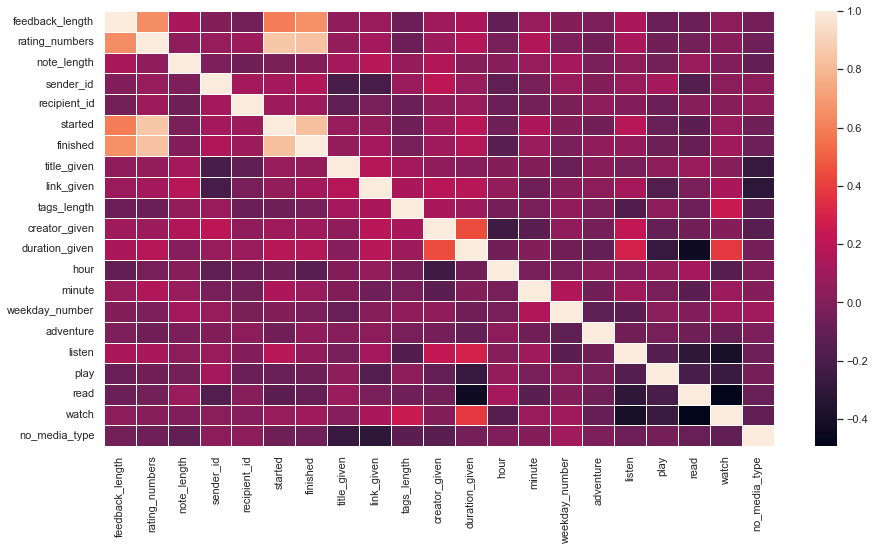

In [500]:
# Plotting the correlation matrix for a better overview
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.5)
plt.show()

In [501]:
# Looking at the data more in-depth to see minimum and maximum of every column
pd.set_option("display.max_columns", None)
corr_df.describe()

,feedback_length,rating_numbers,note_length,sender_id,recipient_id,started,finished,title_given,link_given,tags_length,creator_given,duration_given,hour,minute,weekday_number,adventure,listen,play,read,watch,no_media_type
count,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000
mean,18.026178,0.874346,70.303665,5.382199,7.858639,0.219895,0.193717,0.984293,0.952880,1.753927,0.523560,0.403141,15.942408,31.465969,3.617801,0.015707,0.198953,0.099476,0.277487,0.387435,0.020942
std,48.465662,1.802023,76.924857,6.494978,9.309639,0.415264,0.396249,0.124665,0.212453,1.634230,0.500757,0.491818,5.034809,18.079289,1.934588,0.124665,0.400262,0.300087,0.448936,0.488445,0.143568
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,13.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,13.000000,13.500000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,48.000000,4.000000,4.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,16.000000,34.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,105.000000,4.000000,11.000000,0.000000,0.000000,1.000000,1.000000,3.000000,1.000000,1.000000,21.000000,48.000000,5.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,265.000000,5.000000,361.000000,35.000000,44.000000,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000,1.000000,23.000000,59.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [502]:
# # Looking at the data more in-depth to see minimum and maximum of every column
# pd.set_option("display.max_columns", None)
# new_df.describe()

In [503]:
# # Create correlation matrix
# corr = new_df.corr()
# corr

In [504]:
# # Plotting the correlation matrix for a better overview
# sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.5)
# plt.show()

## 5 Predictive model

### 5.1 Preparing the data set

In [505]:
# Checking if there are any null variables for ML model
new_df.isnull().sum()

feedback_given     0
feedback_length    0
rating_given       0
rating_numbers     0
rating_1           0
rating_2           0
rating_3           0
rating_4           0
rating_5           0
note_given         0
tags_given         0
note_length        0
sender_id          0
recipient_id       0
started            0
finished           0
title_given        0
link_given         0
tags_length        0
creator_given      0
duration_given     0
hour               0
minute             0
weekday_number     0
adventure          0
listen             0
play               0
read               0
watch              0
no_media_type      0
dtype: int64

In [506]:
new_df["feedback_given"].value_counts()

0    154
1     37
Name: feedback_given, dtype: int64

Looking at the amount of times that feedback has been given to a recommendation in the data set, it becomes clear that there are more recommendations in the data set that didn't get feedback. Therefore, it is likely that the ML model favors predicting recommendations that will not get feedback, and it will be more difficult for the model to predict when a feedback will be given.

In [507]:
#new_df["rating_given"].value_counts()

### 5.2 Finding the right machine learning model
In order to find the best performing machine learning model, nine different models will be tested on their accuracy.
Models that will be tested are:
- Random Forest
- K-nearest Neighbors
- Gradient Boosting
- Decision Tree
- XGBoost
- LightGBM
- Support Vector Machines
- Multi-layer Perceptron
- Catboost

The following script for identifying the best performing model has been retrieved from GitHub (Soydinc, 2022).

In [508]:
#Model Validation & Model Tuning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Machine Learning 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

acc = []

# Defining the training and test set for each model
def calculate_accuracy(X,y,alg):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=100)
    model = alg().fit(X_train, y_train)
    y_pred = model.predict(X_test)
    ac = accuracy_score(y_test, y_pred)
    acc.append(ac)


In [509]:
# Create the dependent variables
X = new_df.loc[:, "note_length":"no_media_type"]
# Creating the independent variable
y = new_df["feedback_given"]
# Creating the training and testing set
# using test size of 0.2 because data set is small
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# Defining list for models to be tested
models = [RandomForestClassifier,
          KNeighborsClassifier,
          GradientBoostingClassifier, 
          DecisionTreeClassifier,
          XGBClassifier,
          LGBMClassifier,
          SVC,
          MLPClassifier,
          CatBoostClassifier
         ]
# Calculating accuracy for each model
for i in models:
    calculate_accuracy(X, y, i)

/Users/anjadinkel/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:13:37] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.004609
0:	learn: 0.6857832	total: 1.43ms	remaining: 1.43s
1:	learn: 0.6801575	total: 2.46ms	remaining: 1.23s
2:	learn: 0.6747702	total: 3.54ms	remaining: 1.18s
3:	learn: 0.6696100	total: 4.27ms	remaining: 1.06s
4:	learn: 0.6639957	total: 5.09ms	remaining: 1.01s
5:	learn: 0.6583784	total: 5.79ms	remaining: 959ms
6:	learn: 0.6512584	total: 6.43ms	remaining: 912ms
7:	learn: 0.6463068	total: 7.07ms	remaining: 877ms
8:	learn: 0.6409609	total: 7.78ms	remaining: 857ms
9:	learn: 0.6358567	total: 8.74ms	remaining: 865ms
10:	learn: 0.6298379	total: 9.53ms	remaining: 857ms
11:	learn: 0.6233035	total: 10.4ms	remaining: 858ms
12:	learn: 0.6174520	total: 11ms	remaining: 839ms
13:	learn: 0.6123988	total: 11.7ms	remaining: 822ms
14

In [510]:
df_accuracy = pd.DataFrame (acc, columns = ["Accuracy Score"])
model = ["Random Forest",
          "K-nearest Neighbors",
          "Gradient Boosting", 
          "Decision Tree",
          "XGBoost",
          "LightGBM",
          "Support Vector Machines",
          "Multi-layer Perceptron",
          "Catboost"
         ]
df_model = pd.DataFrame (model, columns = ["Models"])
df_accm = pd.concat([df_accuracy,df_model],axis=1)
df_accm["Accuracy Score"] = df_accm["Accuracy Score"]*100

df_accm

,Accuracy Score,Models
0,92.307692,Random Forest
1,79.487179,K-nearest Neighbors
2,92.307692,Gradient Boosting
3,92.307692,Decision Tree
4,92.307692,XGBoost
5,92.307692,LightGBM
6,79.487179,Support Vector Machines
7,79.487179,Multi-layer Perceptron
8,92.307692,Catboost


Text(0.5, 1.0, 'Accuracy levels of models in %')

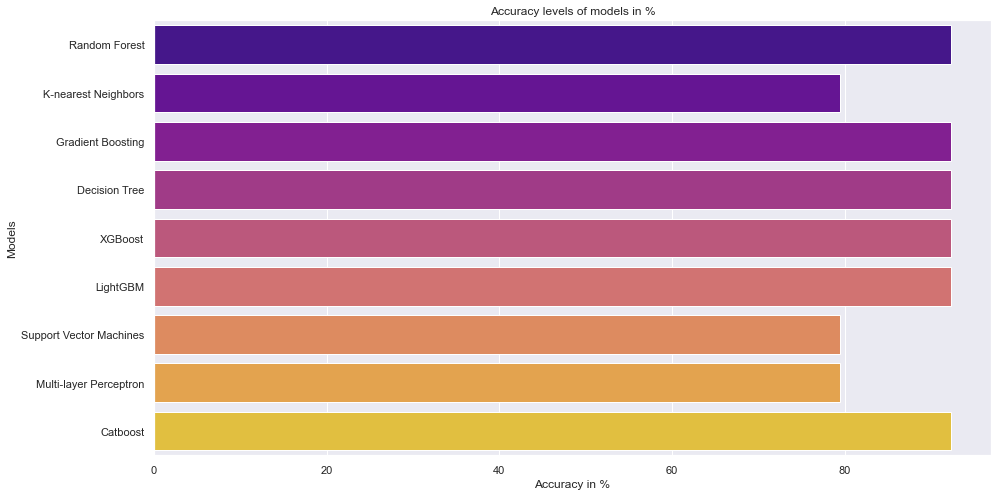

In [511]:
sns.barplot(x="Accuracy Score", y="Models", data=df_accm, palette="plasma")
plt.xlabel("Accuracy in %")
plt.title("Accuracy levels of models in %")

The above analysis shows that Random Forest, Gradient Boosting, Decision Tree, XGBoost, LightGBM, and Catboost share the same accuracy in their predictions with 92.31%.
Previous research in predicting user feedback through random forests have shown to outperform other rough-set models such as KNN, Pawlak, or VPRS (Zhang et al., 2016;Ajesh et al., 2016).
In this project, random forest classifier will be used for the predictive model. Random forests consist of multiple trees each based on a random sample of the training data. Usually, they are more accurate than single decision trees. It can be used to predict both classification and regression. For this assignment, classification will be predicted for if textual feedback will be given or not.

### 5.3 Training the model
The X variables used to predict if feedback will be given are:
- Note length
- Sender ID
- Recipient ID
- Started
- Finished
- Title given
- Link given
- Tag length
- Creator given
- Duration given
- Hour
- Minute
- Weekday
- Attention type
    - Watch
    - Listen
    - Play
    - Read
    - Adventure
    - No media type

The training and test set are seperated by 80% and 20%, respectively. The test size of 20% was chosen, as the data set is relatively small.

In [512]:
# Create the dependent variables
X = new_df.loc[:, "note_length":"no_media_type"]
# Creating the independent variable
y = new_df["feedback_given"]
# Creating the training and testing set
# using test size of 0.2 because data set is small
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [513]:
from sklearn.ensemble import RandomForestClassifier
#RF is a random algorithm, so to get the same results we need to use random_state
rf = RandomForestClassifier(random_state=1)
# fitting the data
rf = rf.fit(X_train, y_train)

### 5.4 Evaluating the model
To evaluate the model, the accuracy will be analyzed and a confusion matrix will be generated. The confusion matrix is a performance measurement for machine learning classification problem where output can be two or more classes. It is a table with 4 different combinations of predicted and actual values. For further analysis, a classification report will be created. In a classification report precision, recall, and f1-score will be measured. Precision is the number of correctly-identified members of a class divided by all the times the model predicted that class. Recall is the number of members of a class that the classifier identified correctly divided by the total number of members in that class. The f1-score combines both precision and recall into one metric.

In [514]:
# accuracy of test set
print("The model shows a test accuracy of",round(100*rf.score(X_test,y_test),2),"%.")

The model shows a test accuracy of 89.74 %.


In [515]:
rf.classes_

array([0, 1])

In [516]:
# The predicted values
y_pred = rf.predict(X_test)
# Creating a "confusion matrix"
cm = confusion_matrix(y_test, y_pred)
#cm_df = pd.DataFrame(cm, index=["no feedback (actual)", "feedback (actual)"], columns = ["no feedback (pred)", "feedback (pred)"]) #label and make df
#cm_df

Text(111.5, 0.5, 'Actual')

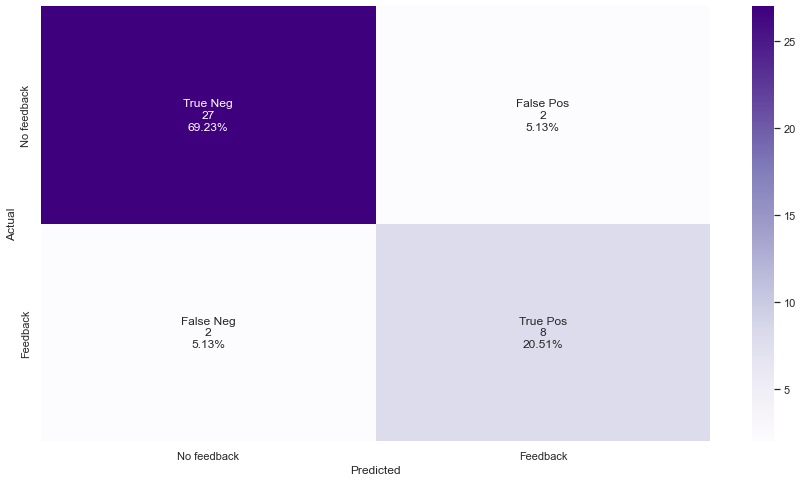

In [517]:
# Plotting the confusion matrix
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
categories = ["No feedback","Feedback"]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt="", xticklabels=categories, yticklabels=categories, cmap="Purples")
plt.xlabel("Predicted")
plt.ylabel("Actual")

The test accuracy of the model is 89.74%, thus, can be improved. The confusion matrix shows that the model has 8 instances where it predicted feedback where it was actual feedback. In 27 instances, the model predicted no feedback where no actual feedback was given. However, it also has 4 false predictions, 2 false positive, and 2 false negative ones.

In [518]:
# Getting classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        29
           1       0.80      0.80      0.80        10

    accuracy                           0.90        39
   macro avg       0.87      0.87      0.87        39
weighted avg       0.90      0.90      0.90        39



The model shows a higher precision, recall, and f1-score (all 93%) for detecting where no feedback is given, and a lower score for where feedback is given (all 80%).

### 5.5 Feature Importance
To better understand the ML model and try to explain its result, the importance of the features used in the model will be evaluated.

note_length 0.06131835552378228
sender_id 0.04514543120040335
recipient_id 0.05767795707157831
started 0.2930670174137397
finished 0.32514699296169414
title_given 0.00016233462827239107
link_given 0.0035224502304742745
tags_length 0.02122349827202184
creator_given 0.010590035392735593
duration_given 0.00574754874623353
hour 0.04955941625617309
minute 0.055062149457445544
weekday_number 0.029600030981351222
adventure 0.006478992591465778
listen 0.016576849458174756
play 0.001393706257710793
read 0.006573030453314432
watch 0.011154203103428994
no_media_type 0.0


[Text(0.5, 1.0, 'Feature importance of Random Forest ML model'),
 Text(0.5, 0, 'Feature importance'),
 Text(0, 0.5, 'Features')]

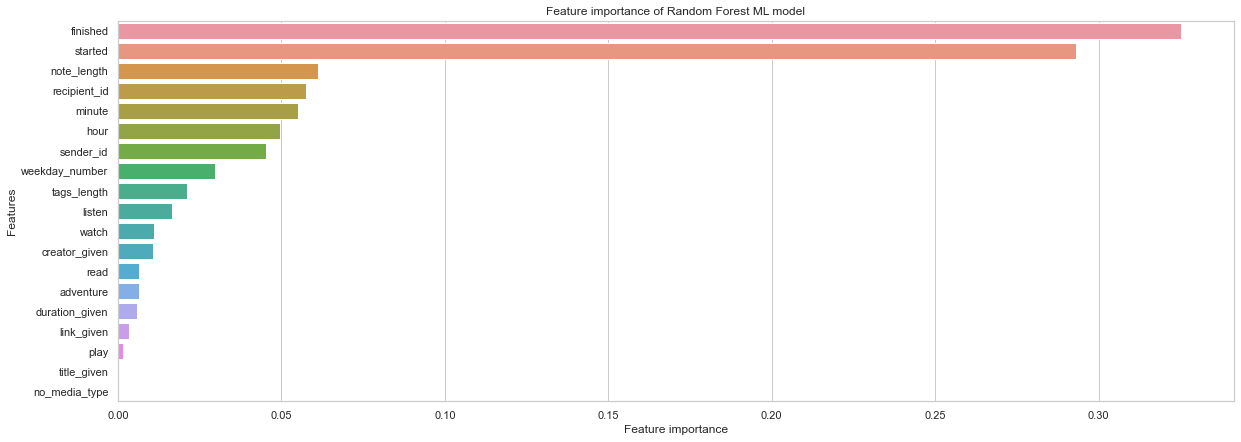

In [519]:
# Creating a df with the feature and their importance value
N_rf = []
S_rf = []

for name_rf, score_rf in zip(X.columns.to_list(), rf.feature_importances_):
    print(name_rf, score_rf)
    N_rf.append(name_rf)
    S_rf.append(score_rf)

#Creating df
f_rf = pd.DataFrame(data=S_rf, index = N_rf, columns=["Feature Importance"])

# sorting by Feature Importance using ascending=False to descending sort
f_rf.sort_values(by=["Feature Importance"], ascending=False, inplace=True)

# Creating bar plot
plt.figure(figsize=(20,7))
sns.set(style="whitegrid")
sns.barplot(y=f_rf.index, x=f_rf["Feature Importance"]).set(title="Feature importance of Random Forest ML model",xlabel="Feature importance",ylabel="Features")

Looking at the feature importance, it becomes apparent, that the indication whether a recommendations got finished (33%) or started (29%), plays an important role in the model. The length of the note, the recipient, the minute and hour a recommendation was sent, as well as the sender also have an impact, even if a little less, on how the model decides how to predict.

### 5.6 Model tuning
To find the best parameters for using a random forest model, the model will be tuned using Grid Search. Parameters that will be changed are:
- Number of trees in the forest (n_estimators)
- Randomness in the samples when building trees (random_state)
- Maximum depth of trees (max_depth)
- Number of considered features for the best split (max_features)

In [520]:
rf_parameter = {"n_estimators": [1,2,3,4,5],
                "random_state": [1,10,100,1000],
                "max_depth": [2,4,6,8,10],
                "max_features": [2,4,8,16]
                 }
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
rf_model = RandomForestClassifier().fit(X_train, y_train)
rf_cv_model = GridSearchCV(rf_model, 
                           rf_parameter, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 400 candidates, totalling 4000 fits
[CV] max_depth=2, max_features=2, n_estimators=1, random_state=1 .....
[CV] max_depth=2, max_features=2, n_estimators=1, random_state=1 .....
[CV] max_depth=2, max_features=2, n_estimators=1, random_state=1 .....
[CV]  max_depth=2, max_features=2, n_estimators=1, random_state=1, total=   0.0s
[CV] max_depth=2, max_features=2, n_estimators=1, random_state=1 .....
[CV] max_depth=2, max_features=2, n_estimators=1, random_state=1 .....
[CV] max_depth=2, max_features=2, n_estimators=1, random_state=1 .....
[CV] max_depth=2, max_features=2, n_estimators=1, random_state=1 .....
[CV]  max_depth=2, max_features=2, n_estimators=1, random_state=1, total=   0.0s
[CV]  max_depth=2, max_features=2, n_estimators=1, random_state=1, total=   0.0s
[CV] max_depth=2, max_features=2, n_estimators=1, random_state=1 .....
[CV]  max_depth=2, max_features=2, n_estimators=1, random_state=1, total=   0.0s
[CV] max_depth=2, max_features=2, n_estimat

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[CV] max_depth=2, max_features=2, n_estimators=2, random_state=10 ....
[CV]  max_depth=2, max_features=2, n_estimators=2, random_state=10, total=   0.0s
[CV] max_depth=2, max_features=2, n_estimators=2, random_state=10 ....
[CV]  max_depth=2, max_features=2, n_estimators=2, random_state=1, total=   0.0s
[CV] max_depth=2, max_features=2, n_estimators=2, random_state=1 .....
[CV] max_depth=2, max_features=2, n_estimators=2, random_state=100 ...
[CV]  max_depth=2, max_features=2, n_estimators=2, random_state=10, total=   0.0s
[CV] max_depth=2, max_features=2, n_estimators=2, random_state=10 ....
[CV]  max_depth=2, max_features=2, n_estimators=2, random_state=10, total=   0.0s
[CV] max_depth=2, max_features=2, n_estimators=2, random_state=10 ....
[CV] max_depth=2, max_features=2, n_estimators=2, random_state=100 ...
[CV]  max_depth=2, max_features=2, n_estimators=2, random_state=1, total=   0.0s
[CV] max_depth=2, max_features=2, n_estimators=2, random_state=10 ....
[CV]  max_depth=2, max_f

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2608 tasks      | elapsed:    4.1s


[CV]  max_depth=8, max_features=4, n_estimators=5, random_state=10, total=   0.0s
[CV] max_depth=8, max_features=4, n_estimators=5, random_state=10 ....
[CV]  max_depth=8, max_features=8, n_estimators=1, random_state=10, total=   0.0s
[CV] max_depth=8, max_features=8, n_estimators=1, random_state=100 ...
[CV]  max_depth=8, max_features=4, n_estimators=4, random_state=10, total=   0.0s
[CV] max_depth=8, max_features=4, n_estimators=4, random_state=10 ....
[CV]  max_depth=8, max_features=8, n_estimators=1, random_state=100, total=   0.0s
[CV] max_depth=8, max_features=8, n_estimators=1, random_state=100 ...
[CV]  max_depth=8, max_features=8, n_estimators=2, random_state=1000, total=   0.0s
[CV] max_depth=8, max_features=8, n_estimators=2, random_state=1000 ..
[CV]  max_depth=8, max_features=8, n_estimators=2, random_state=1, total=   0.0s
[CV] max_depth=8, max_features=8, n_estimators=2, random_state=1 .....
[CV]  max_depth=8, max_features=4, n_estimators=4, random_state=1000, total=   0

[Parallel(n_jobs=-1)]: Done 4000 out of 4000 | elapsed:    5.8s finished


In [521]:
rf_model.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [522]:
# Print the best parameters found on training set
print(rf_cv_model.best_params_)

{'max_depth': 2, 'max_features': 8, 'n_estimators': 4, 'random_state': 1}


The script gives different parameters every time it runs. The 2,8,5,1000

In [523]:
rf_tuned = RandomForestClassifier(max_depth=2,max_features=8,n_estimators=5,random_state=1000)
rf_tuned = rf.fit(X_train, y_train)

In [524]:
# accuracy of test set
print("The tuned model shows a test accuracy of",round(100*rf_tuned.score(X_test,y_test),2),"%.")

The tuned model shows a test accuracy of 92.31 %.


In [525]:
rf_tuned.classes_

array([0, 1])

In [526]:
# The predicted values
y_pred = rf_tuned.predict(X_test)
# Creating a "confusion matrix"
cm = confusion_matrix(y_test, y_pred)
#cm_df = pd.DataFrame(cm, index=["no feedback (actual)", "feedback (actual)"], columns = ["no feedback (pred)", "feedback (pred)"]) #label and make df
#cm_df

Text(111.5, 0.5, 'Actual')

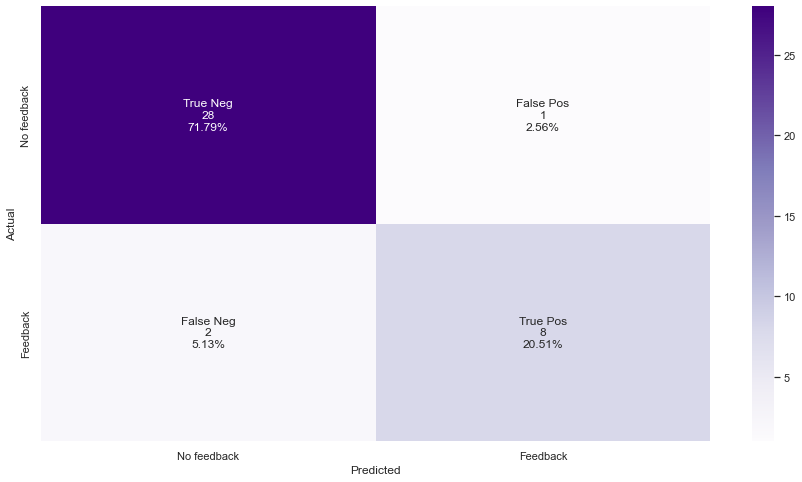

In [527]:
# Plotting the confusion matrix
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
categories = ["No feedback","Feedback"]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt="", xticklabels=categories, yticklabels=categories, cmap="Purples")
plt.xlabel("Predicted")
plt.ylabel("Actual")

The test accuracy of the tuned model is 92.31%, it, therefore, improved in comparison to the first model. The confusion matrix shows that the model has 8 instances where it predicted feedback where it was actual feedback. In 28 instances, the model predicted no feedback where no actual feedback was given. 
The tuned model has 3 false positive predictions, 2 false negative, and 1 false positive.

In [528]:
# Getting classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        29
           1       0.89      0.80      0.84        10

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39



The model shows a higher precision (93%), recall (97%), and f1-score (95%) for detecting where no feedback is given, and a lower score for where feedback is given (89%, 80%, and 84%, respectively). The tuned model improved in precision, recall, and f1-score in both instances, whether feedback was given or not in comparison to the first model.

note_length 0.06541817147163104
sender_id 0.04253078149489851
recipient_id 0.05554116078711737
started 0.23226174777745104
finished 0.3281909130028506
title_given 0.0
link_given 0.002622193583260797
tags_length 0.02328447842705449
creator_given 0.014144624720366785
duration_given 0.013594884892827534
hour 0.07455160023126811
minute 0.07424390599884702
weekday_number 0.03364675188402416
adventure 0.004969493217391788
listen 0.009587929969731436
play 0.002780457057313126
read 0.01039699947425362
watch 0.01223390600971247
no_media_type 0.0


[Text(0.5, 1.0, 'Feature importance of Random Forest ML model'),
 Text(0.5, 0, 'Feature importance'),
 Text(0, 0.5, 'Features')]

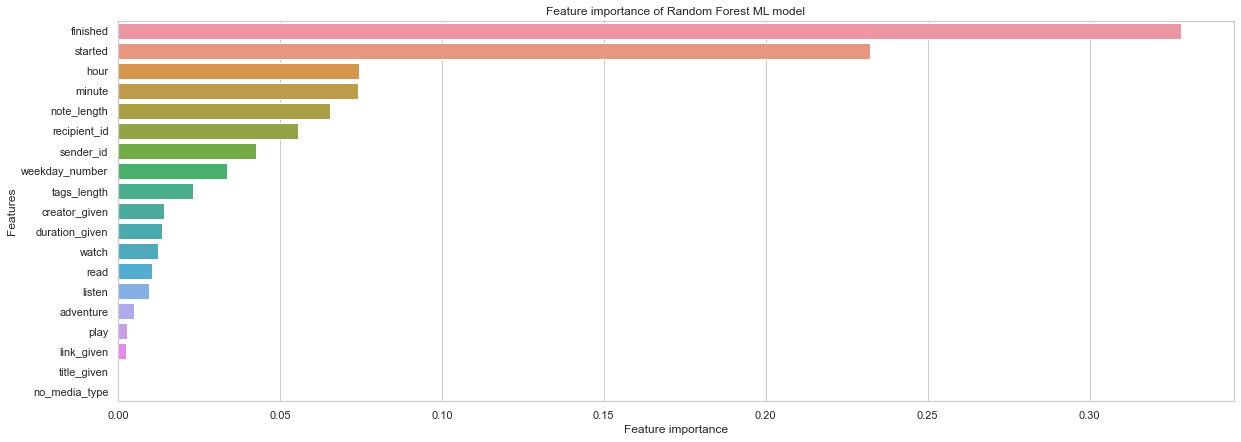

In [529]:
# Creating a df with the feature and their importance value
N_rf = []
S_rf = []

for name_rf, score_rf in zip(X.columns.to_list(), rf_tuned.feature_importances_):
    print(name_rf, score_rf)
    N_rf.append(name_rf)
    S_rf.append(score_rf)

#Creating df
f_rf = pd.DataFrame(data=S_rf, index = N_rf, columns=["Feature Importance"])

# sorting by Feature Importance using ascending=False to descending sort
f_rf.sort_values(by=["Feature Importance"], ascending=False, inplace=True)

# Creating bar plot
plt.figure(figsize=(20,7))
sns.set(style="whitegrid")
sns.barplot(y=f_rf.index, x=f_rf["Feature Importance"]).set(title="Feature importance of Random Forest ML model",xlabel="Feature importance",ylabel="Features")

Looking at the feature importance, it becomes apparent, that the indication whether a recommendations got finished (33%) or started (23%), still plays an important role in the tuned model. The hour and minute a recommendation was sent, the length of the note, the recipient, the sender, as well as the weekday also have an impact, even if a little less, on how the tuned model decides how to predict.

## 6 Conclusion
This study set out to establish whether a machine learning model can accurately predict if explicit user feedback is given, using information about a recommendation such as media type, weekday, tags, or a personal note from the sender to the receiver. The information about a recommendation has been gained through feature engineering on the data set. A test to find the best machine learning model, has found that random forest was under the best performing models and was therefore used to train and test on the data set.
The results showed that the first random forest model could predict feedback with an accuracy of 90%, a precision, recall, and f1-score of 93% for detecting where no feedback was given, and a score of 80% for where feedback was given. The first model is therefore better at predicting when no feedback is given than when feedback is given. The feature importance showed that the indication whether a recommendations got finished (33%) or started (29%), played an important role in how the model made its decisions. Using Grid Search, the best parameters for using a random forest model on this data set. Changing the number of trees in the forest, the randomness in the samples, the maximum depth of trees, and the number of considered features for each split, developed an overall better performing tuned random forest model. The tuned model achieved an accuracy of 92%. Precision, recall, and f1-score reached higher scores for detecting where no feedback was given, and for where feedback was given. The tuned model was still better at predicting when no feedback is given than when feedback is given. The feature importance of the tuned model did not change in terms of the two most important features in comparison to the first model. These findings suggest that a machine learning model can predict if explicit user feedback is given with an accuracy of 92%.

## Literature
Ajesh, A., Nair, J., & Jijin, P. S. (2016). A random forest approach for rating-based recommender system. 2016 International Conference on Advances in Computing, Communications and Informatics, ICACCI 2016, 1293–1297. https://doi.org/10.1109/ICACCI.2016.7732225

Bilgic, M., & Mooney, R. J. (2005). Explaining Recommendations: Satisfaction vs. Promotion. Proceedings of Beyond Personalization 2005: A Workshop on the Next Stage of Recommender Systems Research at The 2005 International Conference on Intelligent User Interfaces, 13–18. http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.64.4814&rep=rep1&type=pdf%5Cnhttp://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.64.4814

Bykau, S. , K. F. , & V. Y. (2013). Coping with the persistent cold-start problem. Personalized Access, Profile Management, and Context Awareness in Databases.

Ji, K., & Shen, H. (2015). Addressing cold-start: Scalable recommendation with tags and keywords. Knowledge-Based Systems, 83, 42–50. https://doi.org/https://doi.org/10.1016/j.knosys.2015.03.008

Leung, C. W., Chan, S. C., & Chung, F. (2008). An empirical study of a cross-level association rule mining approach to cold-start recommendations. Knowledge-Based Systems, 21(7), 515–529. https://doi.org/https://doi.org/10.1016/j.knosys.2008.03.012

Ma, H., Zhou, D., Liu, C., Lyu, M. R., & King, I. (2011). Recommender systems with social regularization. Proceedings of the 4th ACM International Conference on Web Search and Data Mining, WSDM 2011, 287–296. https://doi.org/10.1145/1935826.1935877

Milicevic, A. K., Nanopoulos, A., & Ivanovic, M. (2010). Social tagging in recommender systems: A survey of the state-of-the-art and possible extensions. Artificial Intelligence Review, 33(3), 187–209. https://doi.org/10.1007/s10462-009-9153-2

Nilashi, M., Ibrahim, O., & Bagherifard, K. (2018). A recommender system based on collaborative filtering using ontology and dimensionality reduction techniques. Expert Systems with Applications, 92, 507–520. https://doi.org/https://doi.org/10.1016/j.eswa.2017.09.058

Pagano, D., & Maalej, W. (2013). User feedback in the appstore: An empirical study. 2013 21st IEEE International Requirements Engineering Conference, RE 2013 - Proceedings, 125–134. https://doi.org/10.1109/RE.2013.6636712

Sinha, R., & Swearingen, K. (n.d.). Comparing Recommendations Made by Online Systems and Friends. Retrieved February 28, 2022, from 28/02/2022https://scholar.googleusercontent.com/scholar?q=cache:2lv4PbojRNAJ:scholar.google.com/+Sinha+Swearingen+Comparing++Recommendations++Made++by++Online++Systems++and+friendship&hl=en&as_sdt=0,5

Soydinc, F. (2022). Automated Machine Learning Model Select. https://github.com/firatsoydinc/Automated-Machine-Learning-Model-Select-/blob/main/RMSE - R2 - Accuracy Calculater for different ML algorithm.ipynb

Yang, X., Steck, H., & Liu, Y. (2012). Circle-based recommendation in online social networks. Proceedings of the ACM SIGKDD International Conference on Knowledge Discovery and Data Mining, 1267–1275. https://doi.org/10.1145/2339530.2339728

Ye, M., Shou, D., Lee, W.-C., Yin, P., & Janowicz, K. (2011). On the Semantic Annotation of Places in Location-Based Social Networks. Proceedings of the 17th ACM SIGKDD International Conference on Knowledge Discovery and Data Mining, 520–528. https://doi.org/10.1145/2020408.2020491
 
Zhang, H. R., & Min, F. (2016). Three-way recommender systems based on random forests. Knowledge-Based Systems, 91, 275–286. https://doi.org/10.1016/j.knosys.2015.06.019

Zheng, N., & Li, Q. (2011). A recommender system based on tag and time information for social tagging systems. Expert Systems with Applications, 38(4), 4575–4587. https://doi.org/10.1016/j.eswa.2010.09.131